<p style="background-color:#A435F0; font-family:newtimeroman; font-size:500%; color:white; text-align:center; border-radius:20px 20px; padding: 20px;">
    <b>Udemy Courses Project</b>
</p>
<div style="text-align: center; margin-top: 20px;">
    <img src="udemy_logo_mask.png" alt="Udemy Logo" style="max-width: 100%; height: auto;">
</div>


<div style="text-align: center; margin-top: 20px; font-family: Trebuchet MS; font-size: 18px; background-color: #A435F0; padding: 10px; border-radius: 10px;">
    <h2 style="color: #F7F9FA; font-size: 24px; margin-bottom: 10px;">Important Notice</h2>
    <p style="color: #F7F9FA; margin: 0;">
        *This project includes analyses of Udemy courses and is designed as educational material. The data used in this study is for learning purposes only and has no relation to any real institutions or individuals.*
    </p>
</div>


# Udemy Courses Project

This notebook provides a structured approach to handling data cleaning, exploratory data analysis (EDA), and data visualization tasks using the **Udemy Courses** dataset.

Each step will cover various aspects of cleaning, analyzing, and visualizing the dataset.

<div style="background-color: #A435F0; 
            padding: 20px; 
            border-radius: 10px; 
            font-family: Trebuchet MS; font-size: 35px; font-weight: 900; font-style: italic;
            margin-bottom: 20px;">
    <h1 style="color: #F7F9FA; 
               font-size: 35px; 
               font-weight: 700; 
               margin: 0;">
        Step 1: Loading the Dataset and Initial Exploration
    </h1>
</div>

In [522]:
# Load the dataset 

# Display first few rows
# Check the structure of the dataset.
# Inspect the data types and missing values using df.info()
# Get basic statistics for numerical columns with df.describe()
# and more..

<div style="background-color: white; 
            padding: 20px; 
            border-radius: 10px; 
            border: 5px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 35px; 
            font-weight: 900; 
            font-style: italic;
            margin-bottom: 20px;">
    <h1 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 35px; 
               font-weight: 700; 
               margin: 0;">
        1.1. Install Required Libraries
    </h1>
</div>

In [523]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

import os

# word cloud library
from wordcloud import WordCloud

!pip install cufflinks
import cufflinks as cf # is a library that can work with the pandas library.
cf.go_offline() # we make graphics offline

import folium
from folium import plugins

# warnings
import warnings
warnings.filterwarnings("ignore") #  we use it to not see trivial warnings in the code lines.

Defaulting to user installation because normal site-packages is not writeable


<div style="background-color: white; 
            padding: 20px; 
            border-radius: 10px; 
            border: 5px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 35px; 
            font-weight: 900; 
            font-style: italic;
            margin-bottom: 20px;">
    <h1 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 35px; 
               font-weight: 700; 
               margin: 0;">
        1.2. Load Dataset
    </h1>
</div>


In [524]:
# Load the dataset
df = pd.read_csv("udemy_courses_dataset.csv")

In [525]:
df0=df.copy() # df0 We will create a copy of the original dataset and continue the operations on the copied dataset. This way, any changes made will not affect the original data.
df0

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


<div style="background-color: white; 
            padding: 20px; 
            border-radius: 10px; 
            border: 5px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 35px; 
            font-weight: 900; 
            font-style: italic;
            margin-bottom: 20px;">
    <h1 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 35px; 
               font-weight: 700; 
               margin: 0;">
        1.3. Information of Columns
    </h1>
</div>

In [526]:
# The dataset contains totaling 12 columns.

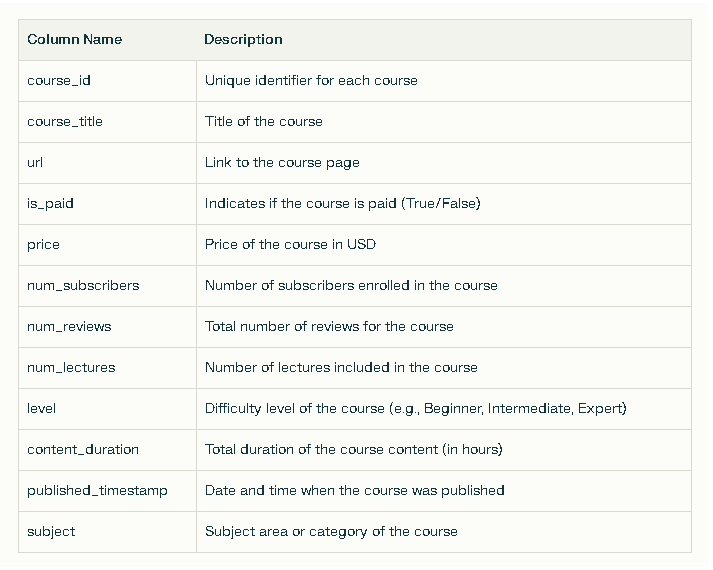

In [527]:
# The dataset contains 6 categorical columns and 6 numeric columns.

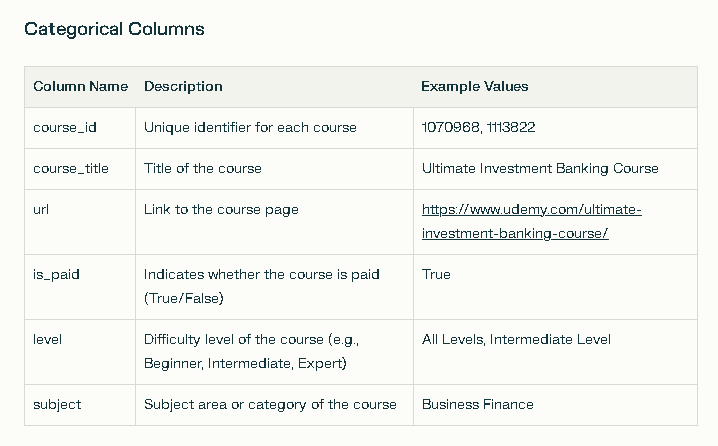

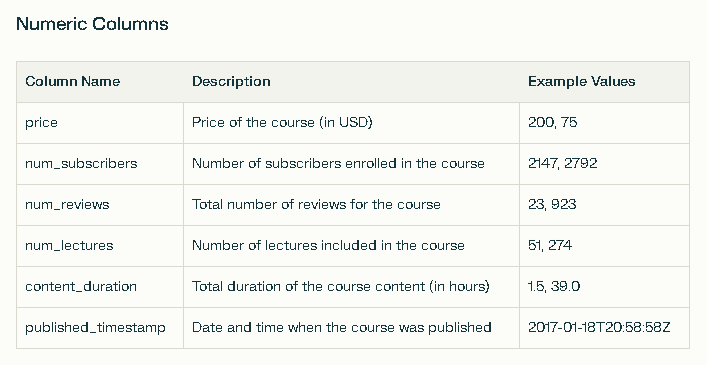

<div style="background-color: white; 
            padding: 20px; 
            border-radius: 10px; 
            border: 5px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 35px; 
            font-weight: 900; 
            font-style: italic;
            margin-bottom: 20px;">
    <h1 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 35px; 
               font-weight: 700; 
               margin: 0;">
        1.4. Data Exploration 
    </h1>
</div>

In [528]:
df # View dataframe

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [529]:
df.head() # View the first 5 rows

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [530]:
df.tail() # View the last 5 rows

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28T19:51:11Z,Web Development


In [531]:
df.sample(5) #random sample 5 data in dataset

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3670,330900,Learn Grunt with Examples: Automate Your Front...,https://www.udemy.com/learn-grunt-automate-you...,True,20,496,113,17,All Levels,1.000000,2014-12-19T21:38:54Z,Web Development
3161,584786,JavaScript HTML CSS Project make a Quiz Tutorial,https://www.udemy.com/javascript-html-css-proj...,True,95,7130,39,24,All Levels,2.000000,2015-08-18T18:37:17Z,Web Development
3114,997916,Amazon Alexa Development: From Beginner to Int...,https://www.udemy.com/amazon-alexa-development...,True,140,1858,110,52,All Levels,2.500000,2016-12-03T20:51:00Z,Web Development
661,355798,Learn Accounting by Specific Examples - Part 1,https://www.udemy.com/accounting1/,True,50,306,0,5,All Levels,0.633333,2014-11-28T05:56:37Z,Business Finance
739,1119920,Financial Ratios Using Excel,https://www.udemy.com/financialratios/,True,100,1223,14,29,Beginner Level,1.000000,2017-03-07T23:10:03Z,Business Finance


In [532]:
df.info() # Overview of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [533]:
df.shape # View the number of rows and columns. The output should be in the form: (number of rows, number of columns)

(3678, 12)

<div style="background-color: white; 
            padding: 20px; 
            border-radius: 10px; 
            border: 5px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 35px; 
            font-weight: 900; 
            font-style: italic;
            margin-bottom: 20px;">
    <h1 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 35px; 
               font-weight: 700; 
               font-style: italic; /* İtalik */
               margin: 0;">
        1.5. Data Statistics 
    </h1>

<div style="background-color: white; 
            padding: 15px; 
            border-radius: 8px; 
            border: 3px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 30px; 
            font-weight: 700; 
            margin-bottom: 15px;">
    <h3 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 30px; 
               font-weight: 700; /* Kalın */
               font-style: italic; /* İtalik */
               margin: 0;">
        1.5.1 Descriptive Statistics
    </h3>
</div>

In [534]:
df.describe() # Displays only the values of integer columns

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


Numerical Data Descriptive Summary

Number of Courses:
There are a total of 3,678 courses available.

Price Analysis:
Average price: 66.05 units, indicating that most courses fall within a reasonable price range.
Standard deviation: 61.01, showing that prices vary widely.
Minimum: 0, meaning some courses are free.
Maximum: 200, indicating that some courses are quite expensive.
Percentiles: 25% are priced below 20 units; 50% below 45 units; 75% below 95 units. This indicates that most courses are reasonably priced.

Number of Subscribers:
Average: 3,197 subscribers, reflecting the popularity of the courses.
Maximum: 268,923 subscribers, demonstrating that the most popular courses reach a very broad audience.
Minimum: 0, indicating that some courses have not gained any subscribers.
Percentiles: 25% have fewer than 111 subscribers; 50% have fewer than 911 subscribers; 75% have fewer than 2,546 subscribers. Popular courses attract a large number of subscribers.

Number of Reviews:
Average: 156 reviews, suggesting that the courses generally receive sufficient feedback.
Maximum: 27,445 reviews, showing that the most reviewed courses are quite popular.
Minimum: 0, meaning some courses have no reviews at all.
Percentiles: 25% have fewer than 4 reviews; 50% have fewer than 18 reviews; 75% have fewer than 67 reviews. Most courses receive few reviews, indicating that some are more attention-grabbing.

Number of Lectures:
Average: 40 lectures, indicating that the courses are generally comprehensive.
Maximum: 779 lectures, suggesting that some courses contain a significant amount of content.
Minimum: 0 lectures, showing that some courses have no lectures; this is likely a data entry error.
Percentiles: 25% have fewer than 15 lectures; 50% have fewer than 25 lectures; 75% have fewer than 45.75 lectures. Most courses offer rich content.

Content Duration:
Average: 4.09 hours, indicating that the courses generally have a reasonable duration.
Maximum: 78.5 hours, suggesting that some courses are very extensive.
Minimum: 0 hours, indicating that some courses have no content at all; this may also be a data entry error.
Percentiles: 25% are shorter than 1 hour; 50% are shorter than 2 hours; 75% are shorter than 4.5 hours. Courses generally provide concise content.

Conclusion
Overall, the platform offers a wide range of prices and content. Popular courses have high subscriber and review counts, highlighting the importance of content quality and marketing. The data reflects the diversity and popularity of courses offered on the platform. The price range and subscriber counts indicate that the courses appeal to a wide user base. However, the presence of 0 for some lecture counts and content durations suggests potential data entry errors. Correcting such erroneous data is important for the accuracy of the analyses.

In [535]:
df.describe(include='object') # Displays the statistical values of string data.

,course_title,url,level,published_timestamp,subject
count,3678,3678,3678,3678,3678
unique,3663,3672,4,3672,4
top,Acoustic Blues Guitar Lessons,https://www.udemy.com/cfa-level-2-quantitative...,All Levels,2017-07-02T14:29:35Z,Web Development
freq,3,2,1929,2,1200


Categorical Data Descriptive Summary;

Course Title (course_title):
There are a total of 3,678 course titles.
The number of unique titles is 3,663, indicating that some titles are repeated. The most frequent title is "Acoustic Blues Guitar Lessons," which appears 3 times.

URL:
Each course has 3672 unique URLs , ensuring that every course has a distinct link.

Level (level):
There are 4 different levels available. The most popular level is "All Levels," which is used 1,929 times, indicating that these courses appeal to a broad audience.

Published Date (published_timestamp):
Each course has an associated published date. The most frequently occurring date is "2017-07-02," appearing 2 times, suggesting that a few courses were released on that specific day.

Subject (subject):
There are 4 different subject categories. The most frequent subject is "Web Development," which appears 1,200 times, highlighting its popularity on the platform.

General Evaluation
The data reflects the diversity and popularity of courses on the platform. The "All Levels" and "Web Development" categories suggest that they cater to a wide user base. Additionally, it is important to note that some course titles are repeated, while the overall number of unique titles is high.

<div style="background-color: white; 
            padding: 15px; 
            border-radius: 8px; 
            border: 3px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 30px; 
            font-weight: 700; 
            margin-bottom: 15px;">
    <h3 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 30px; 
               font-weight: 700; /* Kalın */
               font-style: italic; /* İtalik */
               margin: 0;">
        1.5.2 Check for Missing Values
    </h3>
</div>

In [536]:
df.isnull() # We are checking if there are any NaN values throughout the data, but this method returns all rows and columns

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,False,False,False,False,False,False,False,False,False,False,False,False
3674,False,False,False,False,False,False,False,False,False,False,False,False
3675,False,False,False,False,False,False,False,False,False,False,False,False
3676,False,False,False,False,False,False,False,False,False,False,False,False


In [537]:
# Check for missing values in all columns
df.isnull().sum()   # There are no missing (NaN) values in your DataFrame. This means that there are no missing values for any of the columns.

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [538]:
# This checks for cells that contain empty strings and counts them.
empty_string_count = (df == '').sum()

# This checks for cells that contain a single space character and counts them.
empty_single_space_count = (df == ' ').sum()

print("Count of empty strings:")
print(empty_string_count)

print("\nCount of cells containing a single space:")
print(empty_single_space_count)


Count of empty strings:
course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

Count of cells containing a single space:
course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64


In [539]:
# Displaying the total and percentage of missing values for each column
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data.sort_values(by='Percentage', ascending=False))

                     Missing Values  Percentage
course_id                         0         0.0
course_title                      0         0.0
url                               0         0.0
is_paid                           0         0.0
price                             0         0.0
num_subscribers                   0         0.0
num_reviews                       0         0.0
num_lectures                      0         0.0
level                             0         0.0
content_duration                  0         0.0
published_timestamp               0         0.0
subject                           0         0.0


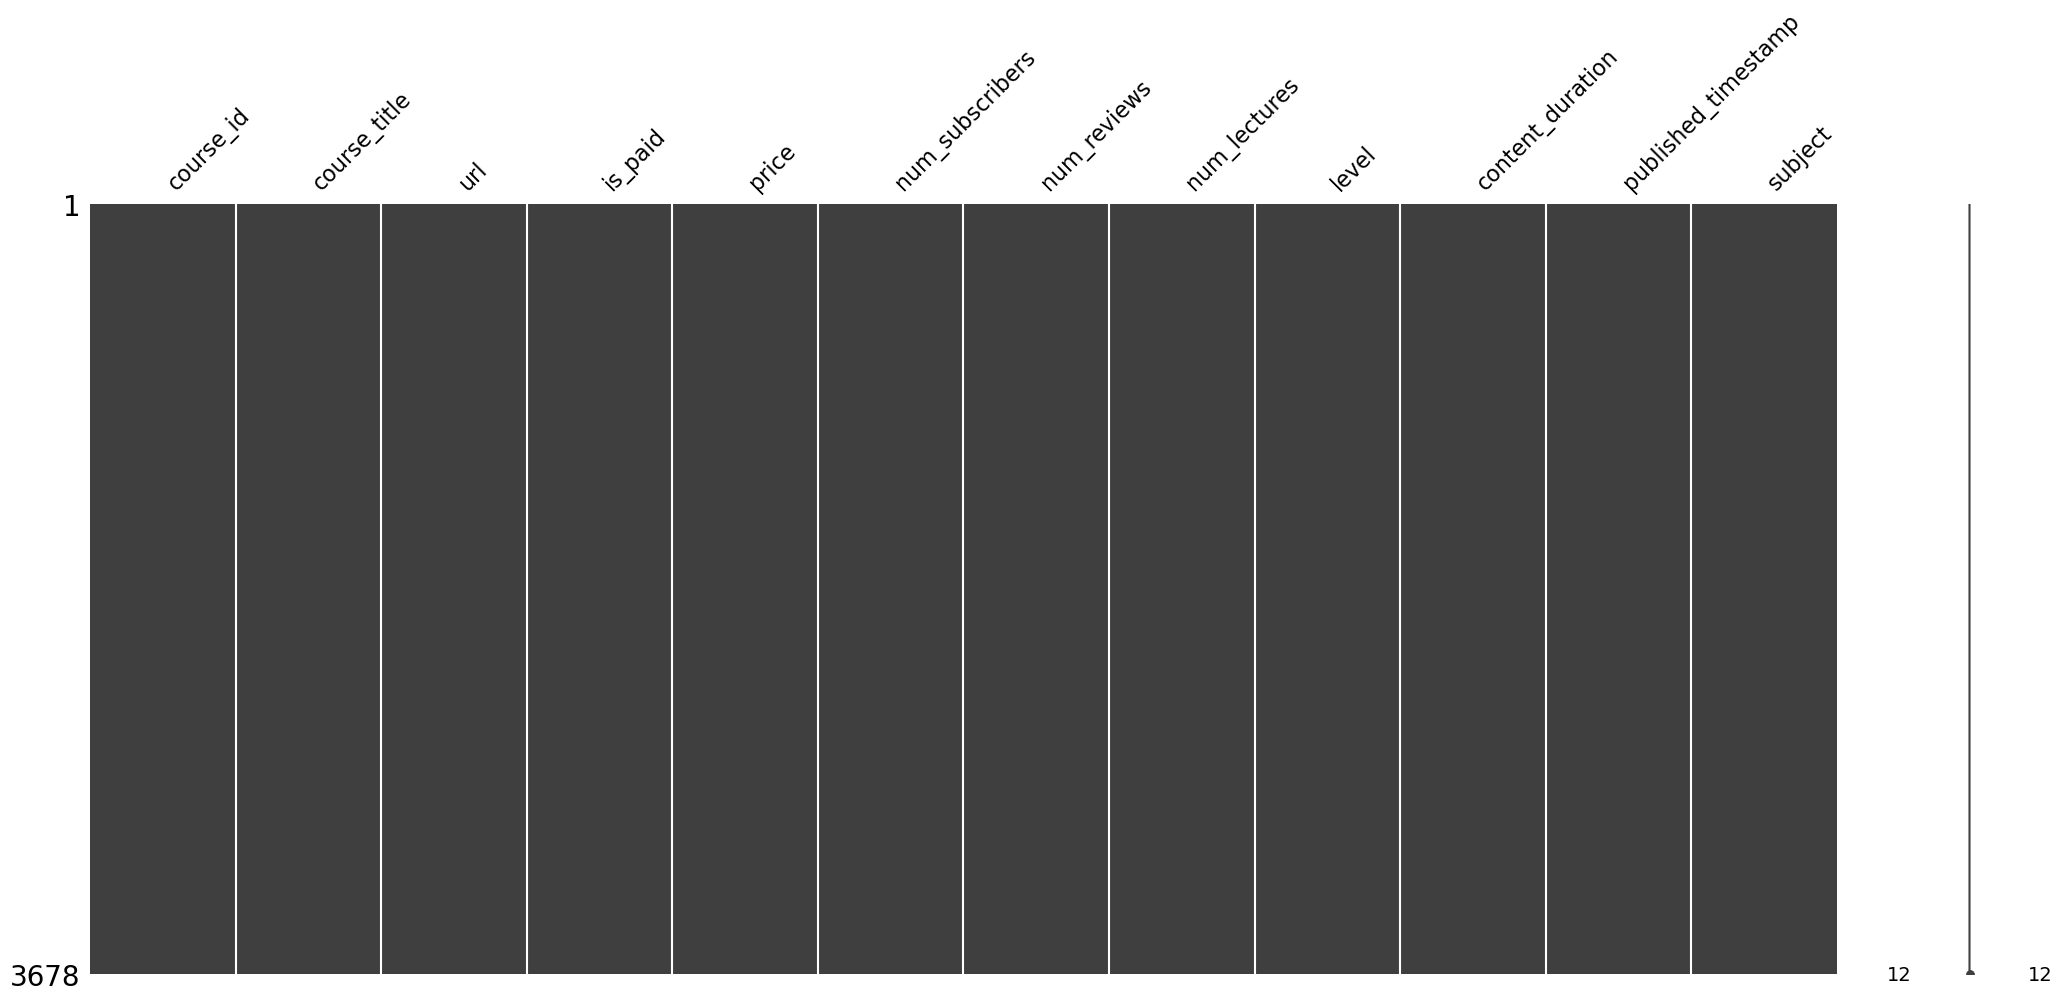

In [540]:
# Visualizing missing values in the DataFrame
# This matrix shows the presence of missing (NaN) values in the dataset.
# If there were missing values, white lines would appear, indicating the locations of the missing data.
msno.matrix(df);

In [541]:
# Count cells with leading or trailing spaces for each column
for column in df.columns:
    leading_or_trailing_count = df[column].apply(lambda x: isinstance(x, str) and (x.startswith(' ') or x.endswith(' '))).sum()
    print(f"There are {leading_or_trailing_count} cells with leading or trailing spaces in the {column} column.")

There are 0 cells with leading or trailing spaces in the course_id column.
There are 78 cells with leading or trailing spaces in the course_title column.
There are 0 cells with leading or trailing spaces in the url column.
There are 0 cells with leading or trailing spaces in the is_paid column.
There are 0 cells with leading or trailing spaces in the price column.
There are 0 cells with leading or trailing spaces in the num_subscribers column.
There are 0 cells with leading or trailing spaces in the num_reviews column.
There are 0 cells with leading or trailing spaces in the num_lectures column.
There are 0 cells with leading or trailing spaces in the level column.
There are 0 cells with leading or trailing spaces in the content_duration column.
There are 0 cells with leading or trailing spaces in the published_timestamp column.
There are 0 cells with leading or trailing spaces in the subject column.


In [542]:
# Remove leading and trailing spaces from the 'course_title' column
# df['course_title'] = df['course_title'].str.strip()

# Remove leading and trailing spaces from all text columns
for column in df.columns:
    if df[column].dtype == 'object':  # Check only text columns
        df[column] = df[column].str.strip()


In [543]:
# Control count cells with leading or trailing spaces for each column
for column in df.columns:
    leading_or_trailing_count = df[column].apply(lambda x: isinstance(x, str) and (x.startswith(' ') or x.endswith(' '))).sum()
    print(f"There are {leading_or_trailing_count} cells with leading or trailing spaces in the {column} column.")

There are 0 cells with leading or trailing spaces in the course_id column.
There are 0 cells with leading or trailing spaces in the course_title column.
There are 0 cells with leading or trailing spaces in the url column.
There are 0 cells with leading or trailing spaces in the is_paid column.
There are 0 cells with leading or trailing spaces in the price column.
There are 0 cells with leading or trailing spaces in the num_subscribers column.
There are 0 cells with leading or trailing spaces in the num_reviews column.
There are 0 cells with leading or trailing spaces in the num_lectures column.
There are 0 cells with leading or trailing spaces in the level column.
There are 0 cells with leading or trailing spaces in the content_duration column.
There are 0 cells with leading or trailing spaces in the published_timestamp column.
There are 0 cells with leading or trailing spaces in the subject column.


<div style="background-color: white; 
            padding: 15px; 
            border-radius: 8px; 
            border: 3px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 30px; 
            font-weight: 700; 
            margin-bottom: 15px;">
    <h3 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 30px; 
               font-weight: 700; /* Kalın */
               font-style: italic; /* İtalik */
               margin: 0;">
        1.5.3 Check for Duplicate Values
    </h3>
</div>

In [544]:
df.shape

(3678, 12)

In [545]:
df.nunique() # Viewing the unique values per column (shape : 3678 x 12---- course_id nunique = 3672 , df has dublicate values)

course_id              3672
course_title           3663
url                    3672
is_paid                   2
price                    38
num_subscribers        2197
num_reviews             511
num_lectures            229
level                     4
content_duration        105
published_timestamp    3672
subject                   4
dtype: int64

In [546]:
# Check for the total number of duplicate values in the DataFrame
duplicate_count = df.duplicated().sum()
duplicate_count  # Total number of repeating values is 6 in this data.

6

In [547]:
# Check for duplicate values in the DataFrame
duplicate_courses = df[df['course_id'].duplicated(keep=False)]  # Keep all duplicates 
duplicate_courses  # Display the duplicate courses

# The result returned 12 rows, as there are 6 duplicate course IDs, each appearing 2 times (6 x 2 = 12)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
453,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
454,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
463,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
778,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1234,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design


In [548]:
# Remove dublicate values from df and assign back to df
df= df.drop_duplicates()

In [549]:
# Check for duplicate values in the DataFrame
df.duplicated().sum()

0

In [550]:
# Check the shape of the DataFrame to confirm the change
df.shape

(3672, 12)

<div style="background-color: #A435F0; 
            padding: 20px; 
            border-radius: 10px; 
            font-family: Trebuchet MS; font-size: 35px; font-weight: 900; font-style: italic;
            margin-bottom: 20px;">
    <h1 style="color: #F7F9FA; 
               font-size: 35px; 
               font-weight: 700; 
               margin: 0;">
        Step 2: Cleaning Inconsistent and Invalid Data
    </h1>
</div>

In [551]:
# Standardizing the 'level' column

# Cleaning up the 'price' column, ensuring free courses have price 0

# Converting 'published_timestamp' to datetime

<div style="background-color: white; 
            padding: 20px; 
            border-radius: 10px; 
            border: 5px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 35px; 
            font-weight: 900; 
            font-style: italic;
            margin-bottom: 20px;">
    <h1 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 35px; 
               font-weight: 700; 
               font-style: italic; /* İtalik */
               margin: 0;">
        2.1. DataFrame Column Overview 
    </h1>

In [552]:
df.columns # Checking column names. There might be no need to change column names if there are no problematic issues with letter case or punctuation marks.

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

<div style="background-color: white; 
            padding: 15px; 
            border-radius: 8px; 
            border: 3px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 30px; 
            font-weight: 700; 
            margin-bottom: 15px;">
    <h3 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 30px; 
               font-weight: 700; /* Kalın */
               font-style: italic; /* İtalik */
               margin: 0;">
        2.1.1. Categorical Column Overview
    </h3>
</div>

In [553]:
# Removes leading and trailing spaces from the level column
df['level'] = df['level'].str.strip()

In [554]:
# Check the unique values of the level column
unique_values_level = df['level'].unique()
unique_values_level

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

<div style="background-color: white; 
            padding: 15px; 
            border-radius: 8px; 
            border: 3px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 30px; 
            font-weight: 700; 
            margin-bottom: 15px;">
    <h3 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 30px; 
               font-weight: 700; /* Kalın */
               font-style: italic; /* İtalik */
               margin: 0;">
        2.1.2. Numeric Column Overview
    </h3>
</div>

In [555]:
# Checking if numeric columns have values less than zero
numeric_columns = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']
negative_values = df[(df[numeric_columns] < 0).any(axis=1)]

if negative_values.empty:
    print("No negative values found.")
else:
    print("Negative Values:", negative_values)

No negative values found.


In [556]:
# Cleaning up the 'price' column, ensuring free courses have price 0
# Setting the price to 0 for free courses
df.loc[df['is_paid'] == False, 'price'] = 0

# Checking the prices of free courses
free_courses = df[df['is_paid'] == False]
print("Prices of free courses:")
print(free_courses['price'])

# Control message
if (free_courses['price'] == 0).all():
    print("All free courses have been set to a price of 0.")
else:
    print("Some free courses do not have a price of 0.")


Prices of free courses:
95      0
103     0
106     0
108     0
112     0
       ..
3638    0
3643    0
3651    0
3665    0
3668    0
Name: price, Length: 310, dtype: int64
All free courses have been set to a price of 0.


In [557]:
# Converting 'published_timestamp' to datetime
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'], errors='coerce')

# Check if the conversion was successful
if df['published_timestamp'].isnull().any():
    print("Some timestamps could not be converted to datetime.")
else:
    print("All timestamps have been successfully converted to datetime.")

# print the first few entries to see the converted values
df['published_timestamp'].head()

All timestamps have been successfully converted to datetime.


0   2017-01-18 20:58:58+00:00
1   2017-03-09 16:34:20+00:00
2   2016-12-19 19:26:30+00:00
3   2017-05-30 20:07:24+00:00
4   2016-12-13 14:57:18+00:00
Name: published_timestamp, dtype: datetime64[ns, UTC]

In [558]:
# Check for invalid datetime entries in published_timestamp
invalid_dates_count = pd.to_datetime(df['published_timestamp'], errors='coerce').isnull().sum()

# Print the result
print(f"Number of invalid published timestamps: {invalid_dates_count}")

Number of invalid published timestamps: 0


In [559]:
# Rename 'published_timestamp' to 'published_date'
df.rename(columns={'published_timestamp': 'published_date'}, inplace=True)

In [560]:
df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_date,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development


<div style="background-color: #A435F0; 
            padding: 20px; 
            border-radius: 10px; 
            font-family: Trebuchet MS; font-size: 35px; font-weight: 900; font-style: italic;
            margin-bottom: 20px;">
    <h1 style="color: #F7F9FA; 
               font-size: 35px; 
               font-weight: 700; 
               margin: 0;">
        Step 3: Analyzing and Handling Outliers
    </h1>
</div>

<div style="background-color: white; 
            padding: 20px; 
            border-radius: 10px; 
            border: 5px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 35px; 
            font-weight: 900; 
            font-style: italic;
            margin-bottom: 20px;">
    <h1 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 35px; 
               font-weight: 700; 
               margin: 0;">
        3.1. Price Column
    </h1>
</div>

In [561]:
# We chose to use the 1st and 99th percentiles instead of Q1 and Q3 to identify outliers in the price column because:

# Wide Data Distribution: There are zero and high values among the prices, which makes Q1 and Q3 less effective.
# Impact of Outliers: Percentiles provide a better reflection of the overall data trend.
# More Reliable Results: This method helps us obtain more reliable results by reducing the impact of outliers.
# We can state that when calculating IQR = Q3 - Q1, negative values were obtained (1.5- 1.0 - 0.75 - 0.50)

In [562]:
# Calculate the %1 and %99 percentiles
lower_bound_price = df['price'].quantile(0.01)
upper_bound_price = df['price'].quantile(0.99)

# Identify outliers
outliers1 = df[(df['price'] < lower_bound_price) | (df['price'] > upper_bound_price)]

# Review the results
print("Lower bound price (1st percentile):", lower_bound_price)
print("Upper bound price (99th percentile):", upper_bound_price)
print("Outliers1:\n", outliers1)

Lower bound price (1st percentile): 0.0
Upper bound price (99th percentile): 200.0
Outliers1:
 Empty DataFrame
Columns: [course_id, course_title, url, is_paid, price, num_subscribers, num_reviews, num_lectures, level, content_duration, published_date, subject]
Index: []


In [563]:
# Analyze the distribution of outlier prices
outlier_prices = outliers1['price'].value_counts().sum()
outlier_prices

0

In [564]:
print("Lower bound price:", lower_bound_price)
print("Upper bound price:", upper_bound_price)
print("Minimum price value:", df['price'].min())
print("Maximum price value:", df['price'].max())

Lower bound price: 0.0
Upper bound price: 200.0
Minimum price value: 0
Maximum price value: 200


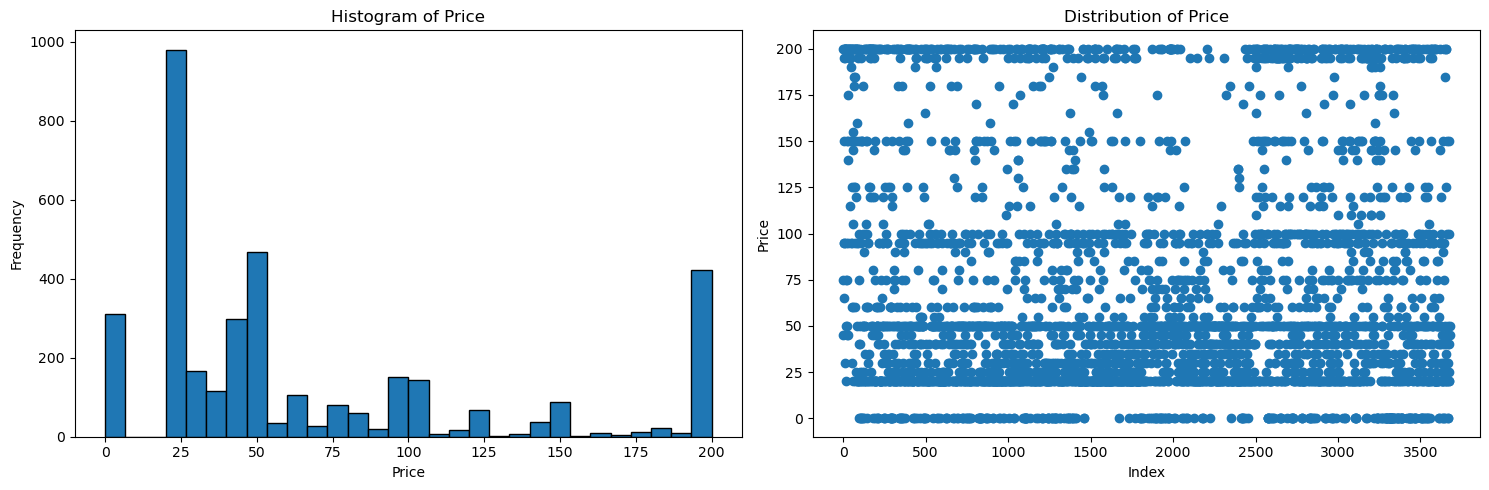

In [565]:
import matplotlib.pyplot as plt

# Create a new figure with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# 1st Plot: Histogram of Price
axs[0].hist(df['price'], bins=30, edgecolor='black')
axs[0].set_title('Histogram of Price')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frequency')

# 2nd Plot: Distribution of Price
axs[1].scatter(df.index, df['price'])
axs[1].set_title('Distribution of Price')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Price')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


<div style="background-color: white; 
            padding: 20px; 
            border-radius: 10px; 
            border: 5px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 35px; 
            font-weight: 900; 
            font-style: italic;
            margin-bottom: 20px;">
    <h1 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 35px; 
               font-weight: 700; 
               margin: 0;">
        3.2. Number of Subscribers Column
    </h1>
</div>

In [566]:
# Calculate the %1 and %99 percentiles
lower_bound_num_subscribers = df['num_subscribers'].quantile(0.01)
upper_bound_num_subscribers = df['num_subscribers'].quantile(0.99)

# Identify outliers
outliers2 = df[(df['num_subscribers'] < lower_bound_num_subscribers) | (df['num_subscribers'] > upper_bound_num_subscribers)]

# Review the results
print("Lower bound num_subscribers (%1 percentile):", lower_bound_num_subscribers)
print("Upper bound num_subscribers (%99 percentile):", upper_bound_num_subscribers)
print("Outliers2:\n", outliers2)

Lower bound num_subscribers (%1 percentile): 0.0
Upper bound num_subscribers (%99 percentile): 40478.31999999995
Outliers2:
       course_id                                       course_title  \
103      133536               Stock Market Investing for Beginners   
143       48841    Accounting in 60 Minutes - A Brief Introduction   
492       49798  Bitcoin or How I Learned to Stop Worrying and ...   
1286      17349  Figure Drawing From Life Using The Reilly Tech...   
1390     399938      Professional Logo Design in Adobe Illustrator   
1461     348116  Photoshop In-Depth: Master all of Photoshop's ...   
1896      19421              Free Beginner Electric Guitar Lessons   
1979     238934  Pianoforall - Incredible New Way To Learn Pian...   
2004      41884                Getting Started with Playing Guitar   
2478      28295  Learn Web Designing & HTML5/CSS3 Essentials in...   
2479      19603  Learning Dynamic Website Design - PHP MySQL an...   
2589     473160  Web Design for Web

In [567]:
# Analyze the distribution of outlier num_subscribers
outlier_num_subscribers = outliers2['num_subscribers'].value_counts().sum()
outlier_num_subscribers

37

In [568]:
print("Lower bound num_subscribers:", lower_bound_num_subscribers)
print("Upper bound num_subscribers:", upper_bound_num_subscribers)
print("Minimum num_subscribers value:", df['num_subscribers'].min())
print("Maximum num_subscribers value:", df['num_subscribers'].max())

Lower bound num_subscribers: 0.0
Upper bound num_subscribers: 40478.31999999995
Minimum num_subscribers value: 0
Maximum num_subscribers value: 268923


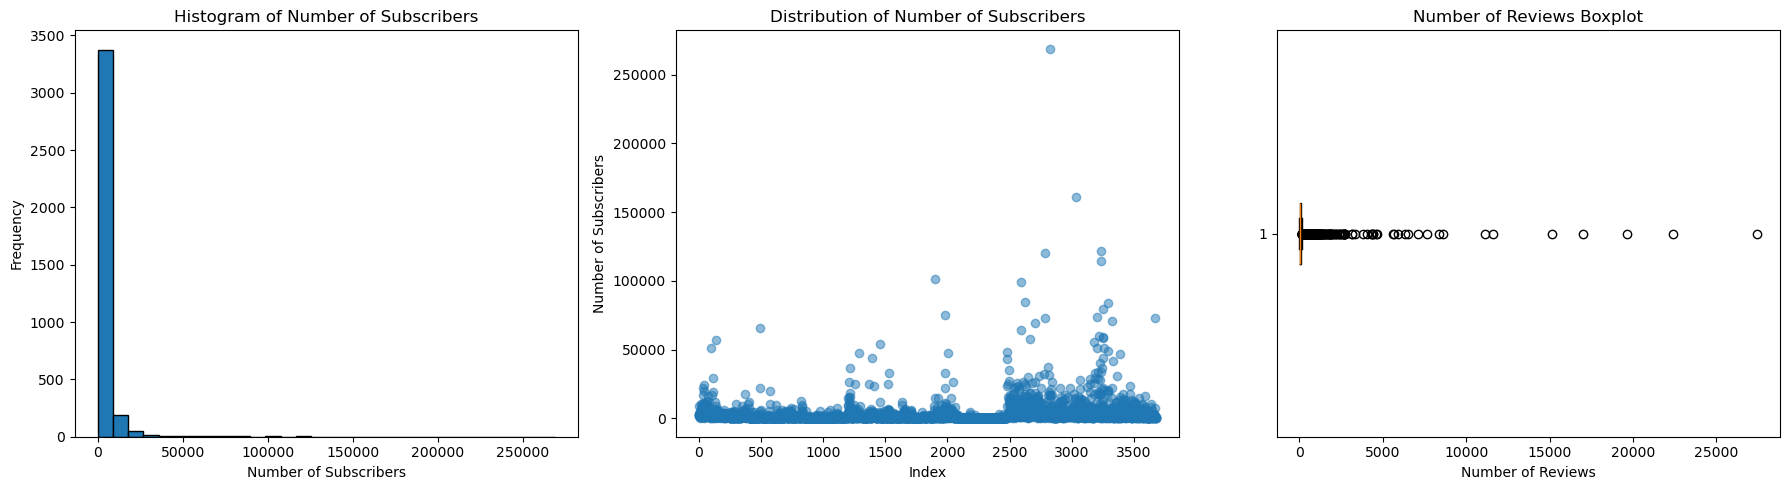

In [569]:
import matplotlib.pyplot as plt

# Figure and subplots configuration
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 satır, 3 sütun

# 1st Plot: Histogram of Number of Subscribers
axs[0].hist(df['num_subscribers'], bins=30, edgecolor='black')
axs[0].set_title('Histogram of Number of Subscribers')
axs[0].set_xlabel('Number of Subscribers')
axs[0].set_ylabel('Frequency')

# 2nd Plot: Distribution of Number of Subscribers
axs[1].scatter(df.index, df['num_subscribers'], alpha=0.5)
axs[1].set_title('Distribution of Number of Subscribers')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Number of Subscribers')

# 3rd Plot: Number of Reviews Boxplot
axs[2].boxplot(df['num_reviews'], vert=False)  # Horizontal boxplot
axs[2].set_title('Number of Reviews Boxplot')
axs[2].set_xlabel('Number of Reviews')  # X axis label since it's horizontal

# Adjust layout
plt.tight_layout()
plt.show()


<div style="background-color: white; 
            padding: 20px; 
            border-radius: 10px; 
            border: 5px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 35px; 
            font-weight: 900; 
            font-style: italic;
            margin-bottom: 20px;">
    <h1 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 35px; 
               font-weight: 700; 
               margin: 0;">
        3.3. Number of Reviews Column
    </h1>
</div>

In [570]:
# Calculate the %1 and %99 percentiles
lower_bound_num_reviews = df['num_reviews'].quantile(0.01)
upper_bound_num_reviews = df['num_reviews'].quantile(0.99)

# Identify outliers
outliers3 = df[(df['num_reviews'] < lower_bound_num_reviews) | (df['num_reviews'] > upper_bound_num_reviews)]

# Review the results
print("Lower bound num_reviews (%1 percentile):", lower_bound_num_reviews)
print("Upper bound num_reviews (%99 percentile):", upper_bound_num_reviews)
print("Outliers3:\n", outliers3)

Lower bound num_reviews (%1 percentile): 0.0
Upper bound num_reviews (%99 percentile): 2387.409999999999
Outliers3:
       course_id                                       course_title  \
36       308690  Forex Trading A-Z™ - With LIVE Examples of For...   
38       321410  Beginner to Pro in Excel: Financial Modeling a...   
103      133536               Stock Market Investing for Beginners   
143       48841    Accounting in 60 Minutes - A Brief Introduction   
1979     238934  Pianoforall - Incredible New Way To Learn Pian...   
1982      42271      Complete Guitar System - Beginner to Advanced   
2589     473160  Web Design for Web Developers: Build Beautiful...   
2592     314462                               Quickstart AngularJS   
2619      94430             Learn Javascript & JQuery From Scratch   
2701      11174                Become a Web Developer from Scratch   
2782      65330  Web Development By Doing: HTML / CSS From Scratch   
2783     173548  Build Your First Website i

In [571]:
# Analyze the distribution of outlier num_reviews
outlier_num_reviews = outliers3['num_reviews'].value_counts().sum()
outlier_num_reviews

37

In [572]:
print("Lower bound num_reviews:", lower_bound_num_reviews)
print("Upper bound num_reviews:", upper_bound_num_reviews)
print("Minimum num_reviews value:", df['num_reviews'].min())
print("Maximum num_reviews value:", df['num_reviews'].max())

Lower bound num_reviews: 0.0
Upper bound num_reviews: 2387.409999999999
Minimum num_reviews value: 0
Maximum num_reviews value: 27445


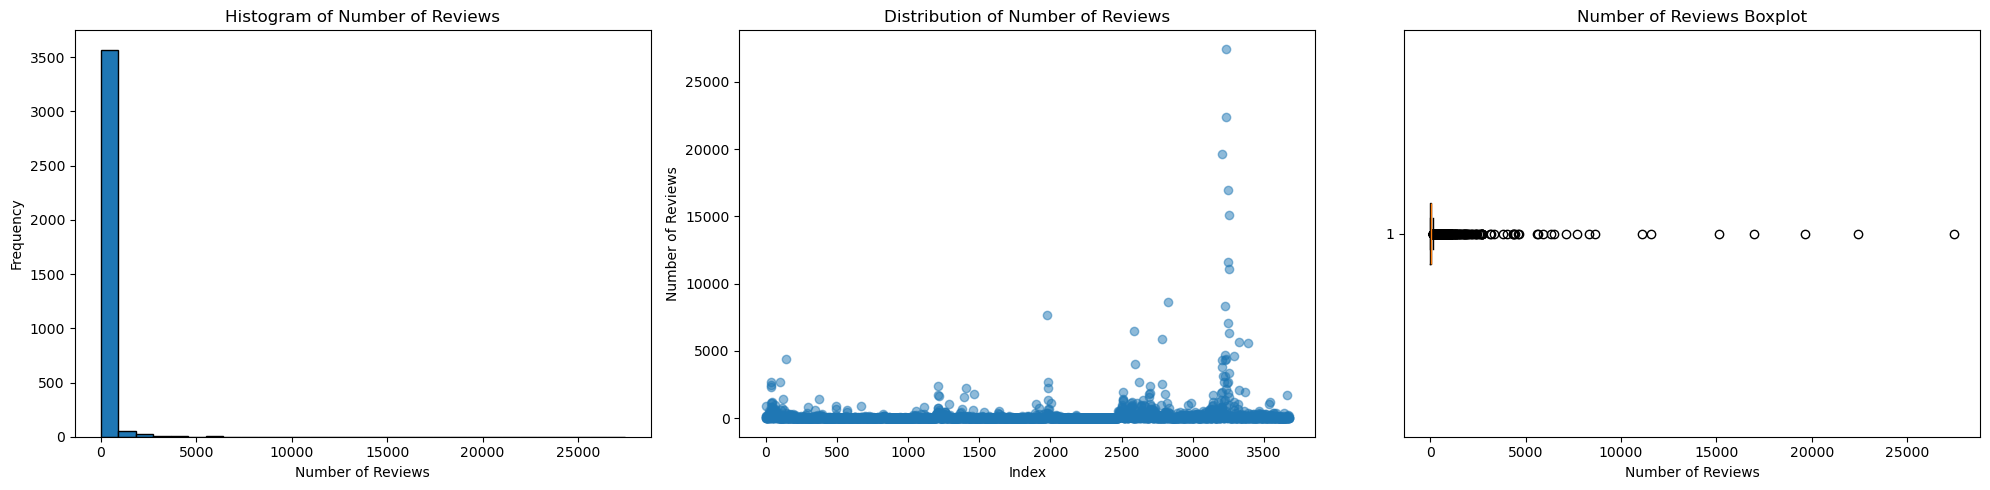

In [573]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# 1st Plot: Histogram of Number of Reviews
axs[0].hist(df['num_reviews'], bins=30, edgecolor='black')
axs[0].set_title('Histogram of Number of Reviews')
axs[0].set_xlabel('Number of Reviews')
axs[0].set_ylabel('Frequency')

# 2nd Plot: Distribution of Number of Reviews
axs[1].scatter(df.index, df['num_reviews'], alpha=0.5)
axs[1].set_title('Distribution of Number of Reviews')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Number of Reviews')

# 3rd Plot: Number of Reviews Boxplot
axs[2].boxplot(df['num_reviews'], vert=False)  # Horizontal boxplot
axs[2].set_title('Number of Reviews Boxplot')
axs[2].set_xlabel('Number of Reviews')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


<div style="background-color: white; 
            padding: 20px; 
            border-radius: 10px; 
            border: 5px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 35px; 
            font-weight: 900; 
            font-style: italic;
            margin-bottom: 20px;">
    <h1 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 35px; 
               font-weight: 700; 
               margin: 0;">
        3.4. Number of Lectures Column
    </h1>
</div>

In [574]:
# Calculate the %1 and %99 percentiles
lower_bound_num_lectures = df['num_lectures'].quantile(0.01)
upper_bound_num_lectures = df['num_lectures'].quantile(0.99)

# Identify outliers
outliers4 = df[(df['num_lectures'] < lower_bound_num_lectures) | (df['num_lectures'] > upper_bound_num_lectures)]

# Review the results
print("Lower bound num_lectures (%1 percentile):", lower_bound_num_lectures)
print("Upper bound num_lectures (%99 percentile):", upper_bound_num_lectures)
print("Outliers4:\n", outliers4)

Lower bound num_lectures (%1 percentile): 5.0
Upper bound num_lectures (%99 percentile): 284.5799999999999
Outliers4:
       course_id                                       course_title  \
114      866584  Advanced Accounting A Complete Study for CA / ...   
160      543242                            Learn to Trade The News   
330      494800               Accounting Basics - A Complete Study   
356      471440  Accounting and Finance for Bankers - A Compreh...   
448      975074  ALGOTECH Hedge Fund Method for Stock Market Tr...   
528      455452  Accounting, Finance and Banking - A Comprehens...   
561      375594            Financial Management - A Complete Study   
655      364566  MCA Accountancy and Financial Management -Pape...   
870      781954  Cost Accounting and Financial Management - A C...   
892      627332  Mutual Funds for Investors in Retirement Accounts   
946      485889            Cost Accounting - A Comprehensive Study   
1979     238934  Pianoforall - Incredible

In [575]:
# Analyze the distribution of outlier num_lectures
outlier_num_lectures = outliers4['num_lectures'].value_counts().sum()
outlier_num_lectures

40

In [576]:
print("Lower bound num_lectures:", lower_bound_num_lectures)
print("Upper bound num_lectures:", upper_bound_num_lectures)
print("Minimum num_lectures value:", df['num_lectures'].min())
print("Maximum num_lectures value:", df['num_lectures'].max())

Lower bound num_lectures: 5.0
Upper bound num_lectures: 284.5799999999999
Minimum num_lectures value: 0
Maximum num_lectures value: 779


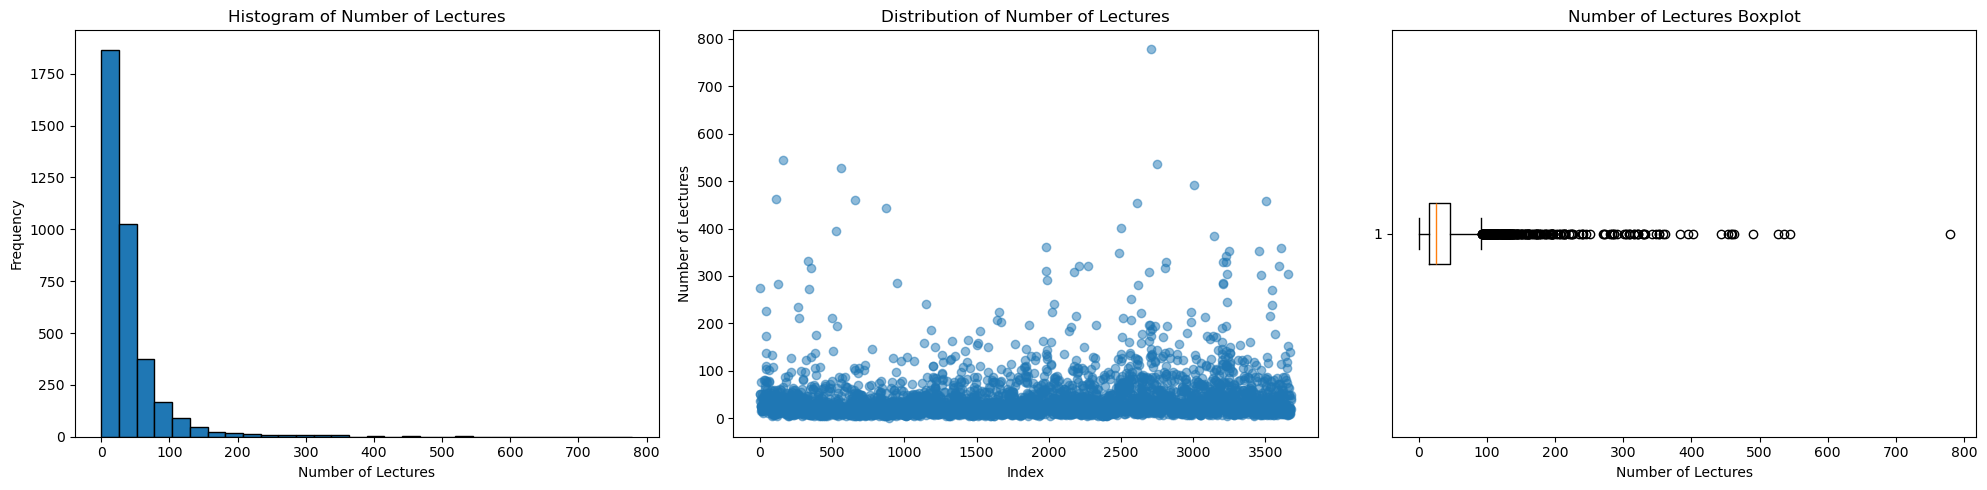

In [577]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 3 columns for the three plots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# 1st Plot: Histogram of Number of Lectures
axs[0].hist(df['num_lectures'], bins=30, edgecolor='black')
axs[0].set_title('Histogram of Number of Lectures')
axs[0].set_xlabel('Number of Lectures')
axs[0].set_ylabel('Frequency')

# 2nd Plot: Distribution of Number of Lectures
axs[1].scatter(df.index, df['num_lectures'], alpha=0.5)
axs[1].set_title('Distribution of Number of Lectures')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Number of Lectures')

# 3rd Plot: Number of Lectures Boxplot
axs[2].boxplot(df['num_lectures'], vert=False)  # Horizontal boxplot
axs[2].set_title('Number of Lectures Boxplot')
axs[2].set_xlabel('Number of Lectures')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


<div style="background-color: white; 
            padding: 20px; 
            border-radius: 10px; 
            border: 5px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 35px; 
            font-weight: 900; 
            font-style: italic;
            margin-bottom: 20px;">
    <h1 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 35px; 
               font-weight: 700; 
               margin: 0;">
        3.5. Content Duration Column
    </h1>
</div>

In [578]:
# Calculate the %1 and %99 percentiles
lower_bound_content_duration = df['content_duration'].quantile(0.01)
upper_bound_content_duration = df['content_duration'].quantile(0.99)

# Identify outliers
outliers5 = df[(df['content_duration'] < lower_bound_content_duration) | (df['content_duration'] > upper_bound_content_duration)]

# Review the results
print("Lower bound content_duration (%1 percentile):", lower_bound_content_duration)
print("Upper bound content_duration (%99 percentile):", upper_bound_content_duration)
print("Outliers5:\n", outliers5)

Lower bound content_duration (%1 percentile): 0.5166666666666666
Upper bound content_duration (%99 percentile): 30.644999999999982
Outliers5:
       course_id                                       course_title  \
1       1113822  Complete GST Course & Certification - Grow You...   
114      866584  Advanced Accounting A Complete Study for CA / ...   
116     1191504                    How to create a routine Trading   
122      840300           B Com Accountancy I (Paper ECO 02 IGNOU)   
160      543242                            Learn to Trade The News   
278      673702        Como hacer empresa en 10 sesiones prácticas   
320      509512  Forex For Beginners - A Guide To Currency Trading   
448      975074  ALGOTECH Hedge Fund Method for Stock Market Tr...   
528      455452  Accounting, Finance and Banking - A Comprehens...   
561      375594            Financial Management - A Complete Study   
590       65802  Financial Risk Manager (FRM) Certification: Le...   
655      364566  

In [579]:
# Analyze the distribution of outlier content_duration
outlier_content_duration = outliers5['content_duration'].value_counts().sum()
outlier_content_duration

58

In [580]:
print("Lower bound content_duration:", lower_bound_content_duration)
print("Upper bound content_duration:", upper_bound_content_duration)
print("Minimum content_duration value:", df['content_duration'].min())
print("Maximum content_duration value:", df['content_duration'].max())

Lower bound content_duration: 0.5166666666666666
Upper bound content_duration: 30.644999999999982
Minimum content_duration value: 0.0
Maximum content_duration value: 78.5


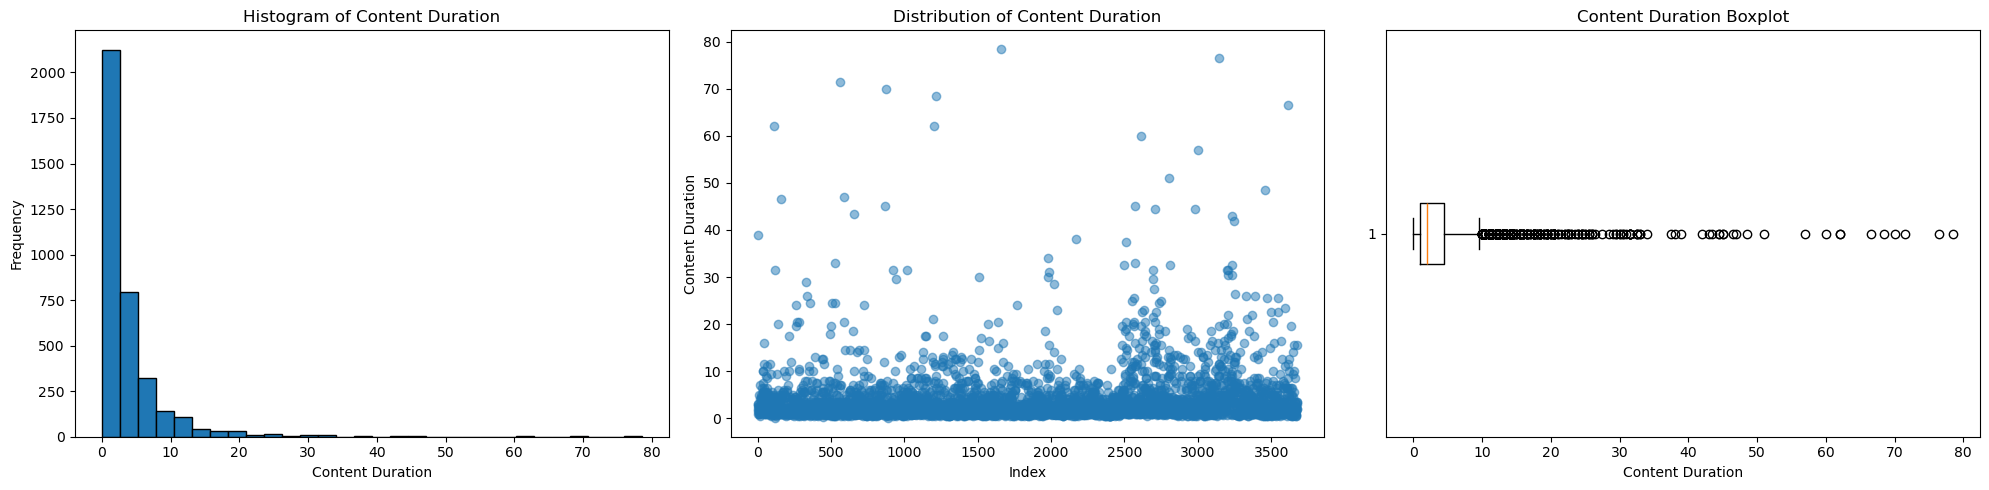

In [581]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# 1st Plot: Histogram of Content Duration
axs[0].hist(df['content_duration'], bins=30, edgecolor='black')
axs[0].set_title('Histogram of Content Duration')
axs[0].set_xlabel('Content Duration')
axs[0].set_ylabel('Frequency')

# 2nd Plot: Distribution of Content Duration
axs[1].scatter(df.index, df['content_duration'], alpha=0.5)
axs[1].set_title('Distribution of Content Duration')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Content Duration')

# 3rd Plot: Content Duration Boxplot
axs[2].boxplot(df['content_duration'], vert=False)  # Horizontal boxplot
axs[2].set_title('Content Duration Boxplot')
axs[2].set_xlabel('Content Duration')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


<div style="background-color: white; 
            padding: 20px; 
            border-radius: 10px; 
            border: 5px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 35px; 
            font-weight: 900; 
            font-style: italic;
            margin-bottom: 20px;">
    <h1 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 35px; 
               font-weight: 700; 
               margin: 0;">
        3.6. Published Date  Column
    </h1>
</div>

In [582]:
# Calculate the %1 and %99 percentiles
lower_bound_published_date = df['published_date'].quantile(0.01)
upper_bound_published_date = df['published_date'].quantile(0.99)

# Identify outliers
outliers6 = df[(df['published_date'] < lower_bound_published_date) | (df['published_date'] > upper_bound_published_date)]

# Review the results
print("Lower bound published_date (%1 percentile):", lower_bound_published_date)
print("Upper bound published_date (%99 percentile):", upper_bound_published_date)
print("Outliers6:\n", outliers6)

Lower bound published_date (%1 percentile): 2012-10-20 14:01:22.790000128+00:00
Upper bound published_date (%99 percentile): 2017-06-29 21:34:49.769999872+00:00
Outliers6:
       course_id                                       course_title  \
130     1245244             Building Financial Statements in Excel   
178       24877                  Introductory Financial Accounting   
379     1273896  Covered Calls - Powerful Income Strategy for S...   
428       25794                                   How To Crowdfund   
455     1282064  Cryptocurrency (BTC & ETH) Investment & Tradin...   
...         ...                                                ...   
3401      14571  Learn HTML5 At Your Own Pace. Ideal for Beginners   
3412      26845         Advanced HTML5 Tutorial for Web Developers   
3470      18448  Learning CSS3 - A Comprehensive Tutorial For W...   
3488    1274210           Learn JSON for beginners with JavaScript   
3665      21386               Beginner Photoshop to HTML5

In [583]:
# Analyze the distribution of outlier published_date 
outlier_published_date = outliers6['published_date'].value_counts().sum()
outlier_published_date 

74

In [584]:
print("Lower bound published_date:", lower_bound_published_date)
print("Upper bound published_date:", upper_bound_published_date)
print("Minimum published_date value:", df['published_date'].min())
print("Maximum published_date value:", df['published_date'].max())

Lower bound published_date: 2012-10-20 14:01:22.790000128+00:00
Upper bound published_date: 2017-06-29 21:34:49.769999872+00:00
Minimum published_date value: 2011-07-09 05:43:31+00:00
Maximum published_date value: 2017-07-06 21:46:30+00:00


In [585]:
df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_date,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development


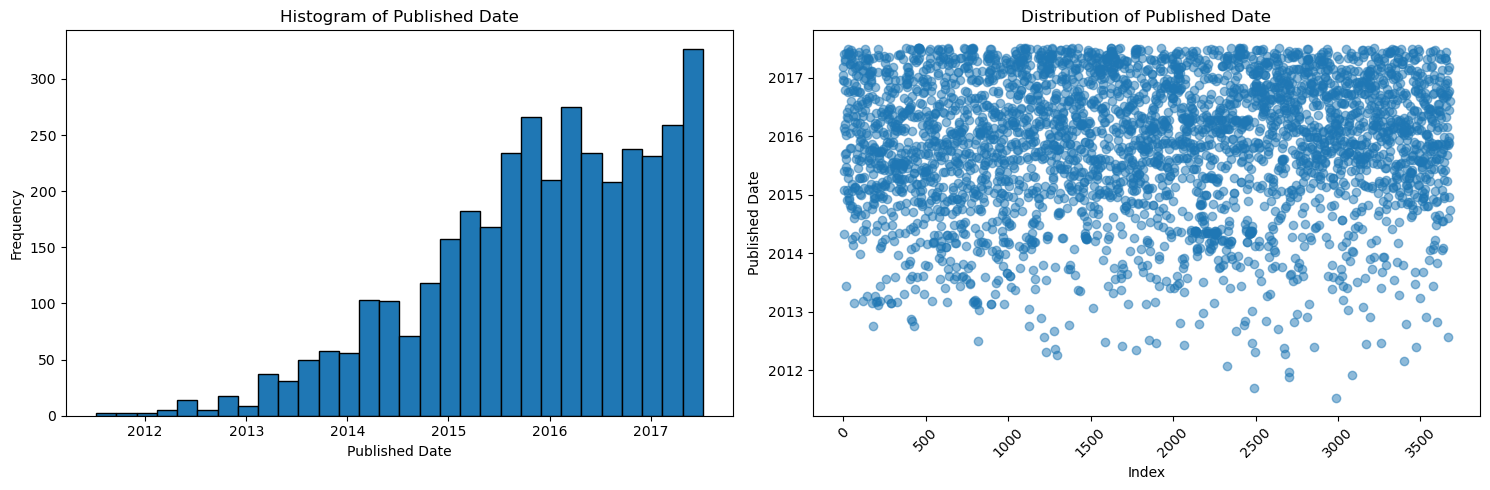

In [586]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'published_date' is a datetime type if it's not already
df['published_date'] = pd.to_datetime(df['published_date'])

# Create a figure with 1 row and 2 columns for the histogram and scatter plot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# 1st Plot: Histogram of Published Date
axs[0].hist(df['published_date'], bins=30, edgecolor='black')
axs[0].set_title('Histogram of Published Date')
axs[0].set_xlabel('Published Date')
axs[0].set_ylabel('Frequency')

# 2nd Plot: Distribution of Published Date
axs[1].scatter(df.index, df['published_date'], alpha=0.5)
axs[1].set_title('Distribution of Published Date')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Published Date')
axs[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


<div style="background-color: #A435F0; 
            padding: 20px; 
            border-radius: 10px; 
            font-family: Trebuchet MS; font-size: 35px; font-weight: 900; font-style: italic;
            margin-bottom: 20px;">
    <h1 style="color: #F7F9FA; 
               font-size: 35px; 
               font-weight: 700; 
               margin: 0;">
        Step 4: Feature Engineering
    </h1>
</div>

In [587]:
# Calculate the revenue for each course by multiplying the price by the number of subscribers
# Revenue represents the total income generated by each course
df['revenue'] = df['price'] * df['num_subscribers']

# Display the first few rows of the updated DataFrame to verify the new 'Revenue' column
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_date,subject,revenue
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,429400
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,209400
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,97830
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,232845
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,255200


In [588]:
# Extracting the year from the 'published_date' column
# Extracting the month from the 'published_date' column
# This allows us to analyze courses based on their publication year and month.
df['published_year'] = pd.to_datetime(df['published_date']).dt.year
df['published_month'] = pd.to_datetime(df['published_date']).dt.month

# Display the first few rows of the updated DataFrame to verify the new 'published_year' and 'published_month' columns
df.head()


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_date,subject,revenue,published_year,published_month
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,429400,2017,1
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,209400,2017,3
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,97830,2016,12
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,232845,2017,5
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,255200,2016,12


In [589]:
# Dropping the 'published_date' column
df.drop(columns=['published_date'], inplace=True)
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,revenue,published_year,published_month
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,Business Finance,429400,2017,1
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,Business Finance,209400,2017,3
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance,97830,2016,12
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,Business Finance,232845,2017,5
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,Business Finance,255200,2016,12


<div style="background-color: #A435F0; 
            padding: 20px; 
            border-radius: 10px; 
            font-family: Trebuchet MS; font-size: 35px; font-weight: 900; font-style: italic;
            margin-bottom: 20px;">
    <h1 style="color: #F7F9FA; 
               font-size: 35px; 
               font-weight: 700; 
               margin: 0;">
        Step 5: Data Visualization
    </h1>
</div>

<div style="background-color: white; 
            padding: 15px; 
            border-radius: 8px; 
            border: 3px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 30px; 
            font-weight: 700; 
            margin-bottom: 15px;">
    <h3 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 30px; 
               font-weight: 700; /* Kalın */
               font-style: italic; /* İtalik */
               margin: 0;">
        Create World Cloud by Title
    </h3>
</div>

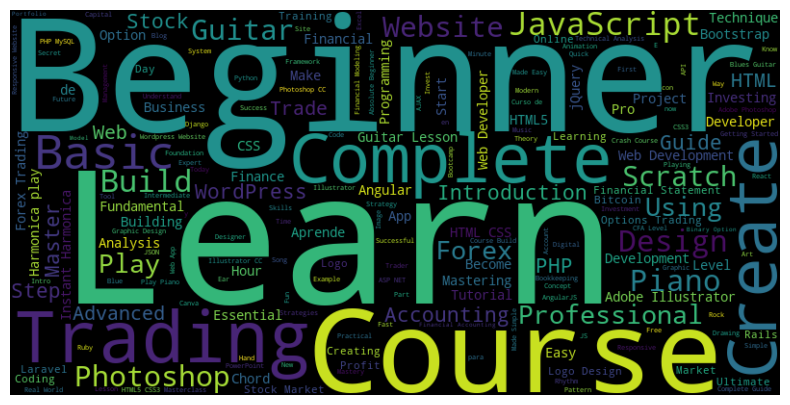

In [590]:
from wordcloud import WordCloud

# Combine all titles into a single string
text = ' '.join(df['course_title'].dropna())

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title('Word Cloud of Course Titles', fontsize=20)
plt.show()


<div style="background-color: white; 
            padding: 20px; 
            border-radius: 10px; 
            border: 5px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 35px; 
            font-weight: 900; 
            font-style: italic;
            margin-bottom: 20px;">
    <h1 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 35px; 
               font-weight: 700; 
               margin: 0;">
         Questions
    </h1>
</div>

<div style="background-color: white; 
            padding: 15px; 
            border-radius: 8px; 
            border: 3px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 30px; 
            font-weight: 700; 
            margin-bottom: 15px;">
    <h3 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 30px; 
               font-weight: 700; /* Kalın */
               font-style: italic; /* İtalik */
               margin: 0;">
        Course Price Distribution
    </h3>
</div>

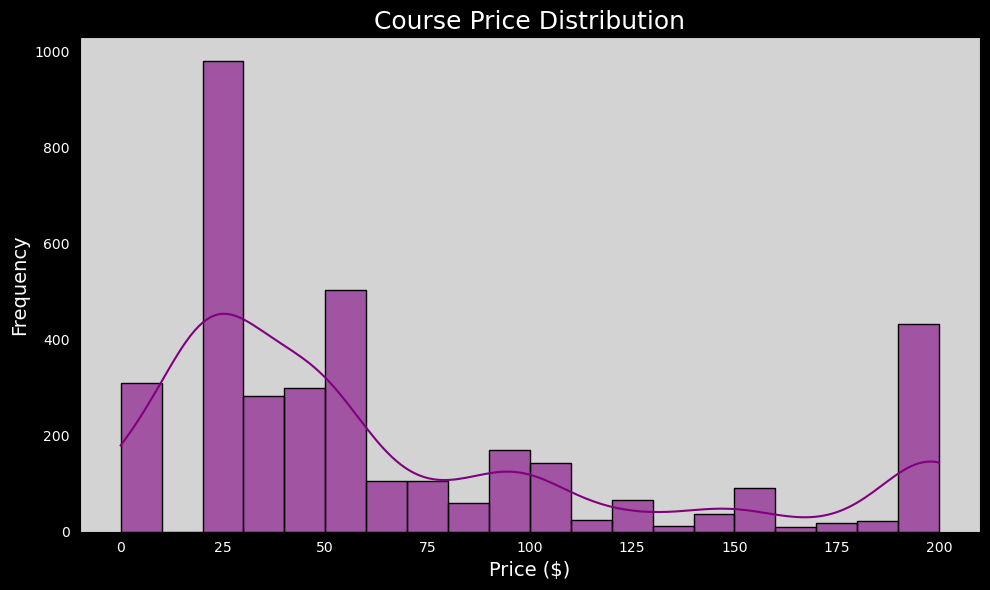

In [591]:
# 1.Histogram for course price distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the histogram with transparency and edges
sns.histplot(df['price'], bins=20, kde=True, color='purple', edgecolor='black', alpha=0.6)  # Transparency for bars

# Set the background color of the figure and axes
fig = plt.gcf()  # Get current figure
fig.patch.set_facecolor('black')  # Set figure background to black
plt.gca().set_facecolor('lightgray')  # Set axes background to light gray

# Adjust title and labels with larger font sizes and white color
plt.title('Course Price Distribution', fontsize=18, color='white')  # Title in white
plt.xlabel('Price ($)', fontsize=14, color='white')  # X-axis label in white
plt.ylabel('Frequency', fontsize=14, color='white')  # Y-axis label in white

# Set the tick labels to white
plt.xticks(color='white')
plt.yticks(color='white')

# Show the plot
plt.tight_layout()
plt.show()


<div style="background-color: white; 
            padding: 15px; 
            border-radius: 8px; 
            border: 3px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 30px; 
            font-weight: 700; 
            margin-bottom: 15px;">
    <h3 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 30px; 
               font-weight: 700; /* Kalın */
               font-style: italic; /* İtalik */
               margin: 0;">
        Relationship Between Price and Number of Subscribers
    </h3>
</div>

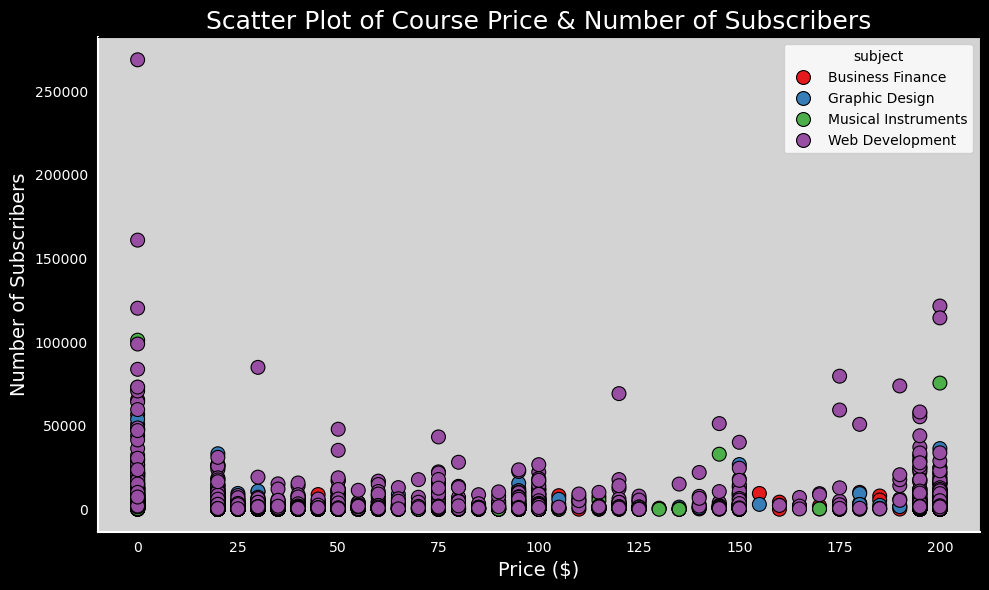

In [592]:
# 2.Scatter plot for price vs. number of subscribers

import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the background color for the figure
fig = plt.gcf()  # Get current figure
fig.patch.set_facecolor('black')  # Set figure background to black

# Create the scatter plot for price vs. number of subscribers (now 'num_subscribers')
ax = sns.scatterplot(data=df, x='price', y='num_subscribers', hue='subject', palette='Set1', s=100, edgecolor='black')

# Set axis background color to light gray
ax.set_facecolor('lightgray')  # Set axis background color to light grey

# Set spines (borders around the plot) color to black for top and right spines
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')

# Set bottom and left spines (x and y axes) to a visible color (white)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Set the width of the visible spines
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

# Add titles and labels with white color
plt.title('Scatter Plot of Course Price & Number of Subscribers', fontsize=18, color='white')
plt.xlabel('Price ($)', fontsize=14, color='white')
plt.ylabel('Number of Subscribers', fontsize=14, color='white')

# Set the tick labels to white
plt.xticks(color='white')
plt.yticks(color='white')

# Show the plot
plt.tight_layout()
plt.show()


<div style="background-color: white; 
            padding: 15px; 
            border-radius: 8px; 
            border: 3px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 30px; 
            font-weight: 700; 
            margin-bottom: 15px;">
    <h3 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 30px; 
               font-weight: 700; /* Kalın */
               font-style: italic; /* İtalik */
               margin: 0;">
        Course Level Distribution
    </h3>
</div>

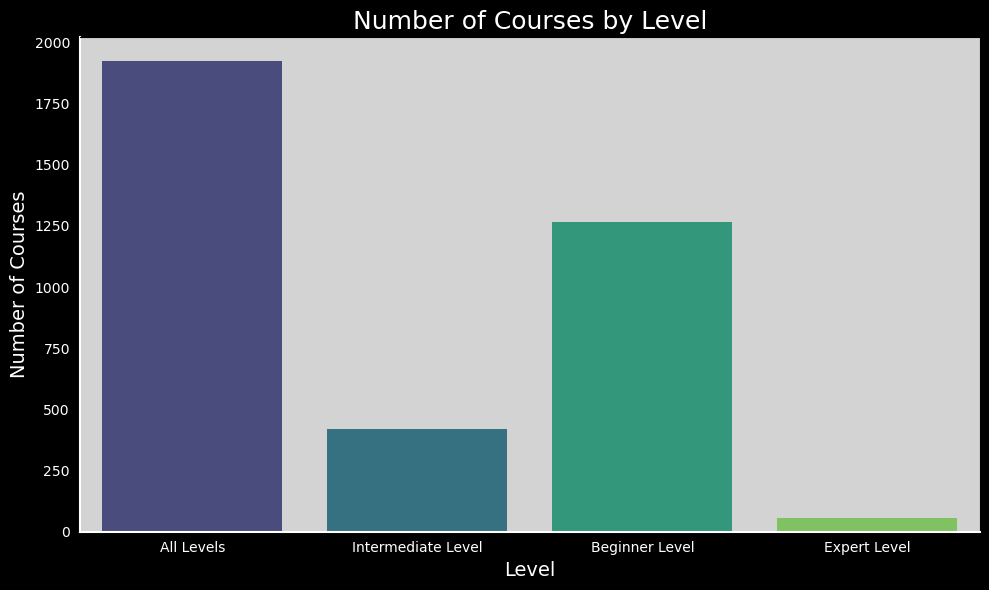

In [593]:
# 3.Bar chart for course levels

import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the background color for the figure
fig = plt.gcf()  # Get current figure
fig.patch.set_facecolor('black')  # Set figure background to black

# Create the bar chart for course levels
ax = sns.countplot(data=df, x='level', palette='viridis')

# Set axis background color to light gray
ax.set_facecolor('lightgray')  # Set axis background color to light grey

# Set spines (borders around the plot) color to black for top and right spines
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')

# Set bottom and left spines (x and y axes) to a visible color (white)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Set the width of the visible spines
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

# Add titles and labels with white color
plt.title('Number of Courses by Level', fontsize=18, color='white')
plt.xlabel('Level', fontsize=14, color='white')
plt.ylabel('Number of Courses', fontsize=14, color='white')

# Set the tick labels to white
plt.xticks(color='white')
plt.yticks(color='white')

# Show the plot
plt.tight_layout()
plt.show()


<div style="background-color: white; 
            padding: 15px; 
            border-radius: 8px; 
            border: 3px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 30px; 
            font-weight: 700; 
            margin-bottom: 15px;">
    <h3 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 30px; 
               font-weight: 700; /* Kalın */
               font-style: italic; /* İtalik */
               margin: 0;">
        Subject-wise Analysis
    </h3>
</div>

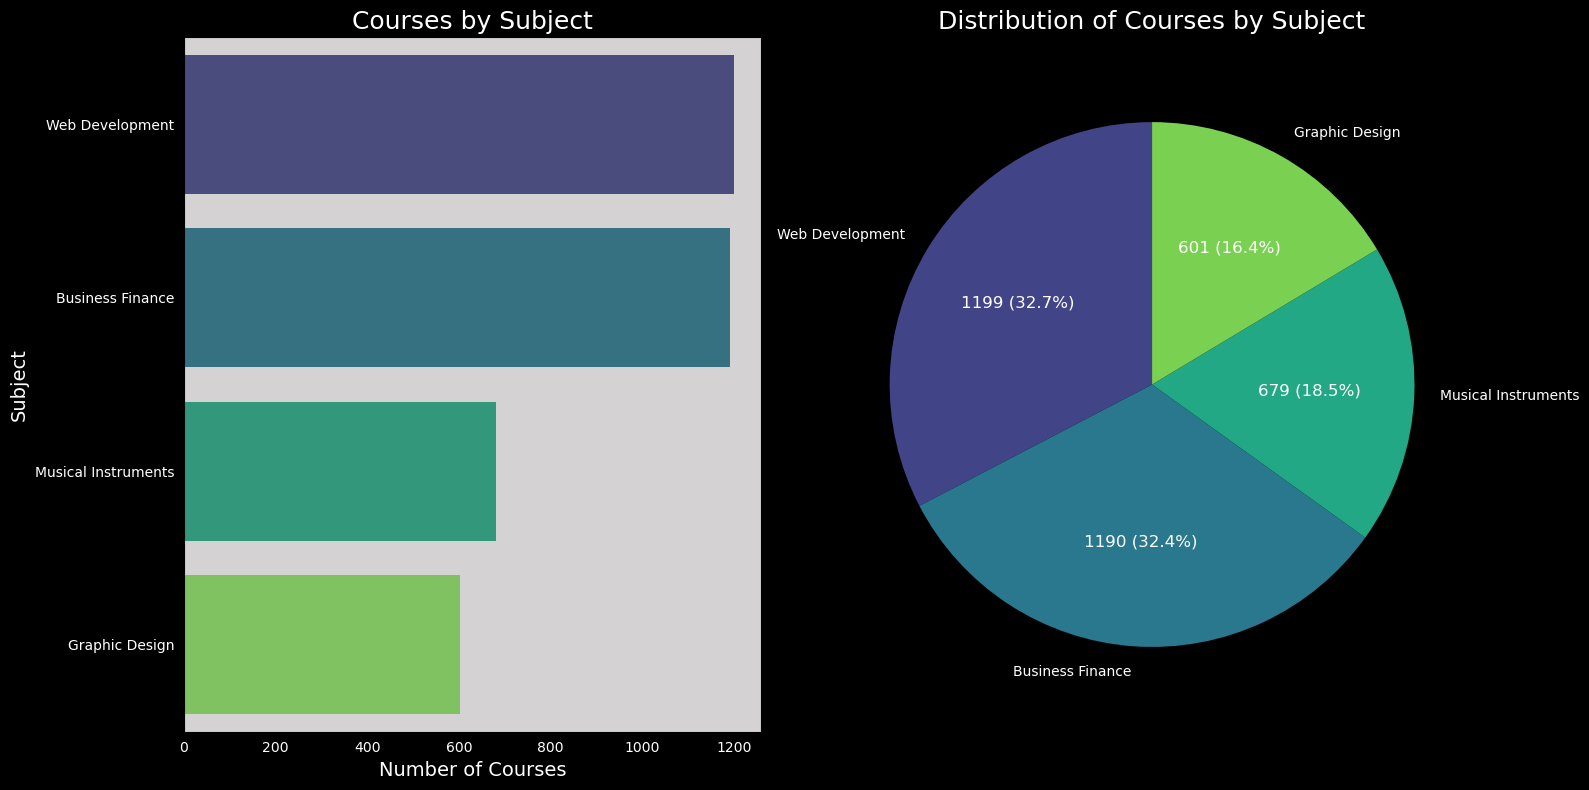

In [594]:
# 4.Bar chart and Pie chart for courses by subject

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the courses data

# Define the counts for each subject
subject_counts = df['subject'].value_counts()

# Set the figure size and layout for two plots (1 row, 2 columns)
plt.figure(figsize=(16, 8))

# Set the background color of the entire figure to black
plt.gcf().patch.set_facecolor('black')

# First subplot: Bar chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot

# Create bar chart
colors = sns.color_palette("viridis", len(subject_counts))
sns.barplot(x=subject_counts.values, y=subject_counts.index, palette=colors)

# Customize the appearance
plt.title('Courses by Subject', fontsize=18, color='white')
plt.xlabel('Number of Courses', fontsize=14, color='white')
plt.ylabel('Subject', fontsize=14, color='white')

# Set the axis face color to light grey and tick labels to white
ax = plt.gca()
ax.set_facecolor('#d4d2d2')  # Set the background color of the axes to light grey
plt.xticks(color='white')  # Set x-axis tick labels to white
plt.yticks(color='white')  # Set y-axis tick labels to white


# Second subplot: Pie chart
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot

# Function to format percentage text
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))  # Calculate the absolute value
    return f'{absolute} ({pct:.1f}%)'  # Return the string to display

# Create pie chart
wedges, texts, autotexts = plt.pie(subject_counts, 
                                   labels=subject_counts.index, 
                                   autopct=lambda pct: func(pct, subject_counts), 
                                   startangle=90, 
                                   colors=colors)

# Customize the appearance of the texts
for text in texts:
    text.set_color('white')  # Set subject names to white

for autotext in autotexts:
    autotext.set_color('white')  # Set percentage text to white
    autotext.set_fontsize(12)  # Set font size for percentage text

plt.title('Distribution of Courses by Subject', fontsize=18, color='white')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Set the background color of the axes to light gray
plt.gca().set_facecolor('#d4d2d2')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


<div style="background-color: white; 
            padding: 15px; 
            border-radius: 8px; 
            border: 3px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 30px; 
            font-weight: 700; 
            margin-bottom: 15px;">
    <h3 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 30px; 
               font-weight: 700; /* Kalın */
               font-style: italic; /* İtalik */
               margin: 0;">
        Revenue Analysis by Year
    </h3>
</div>

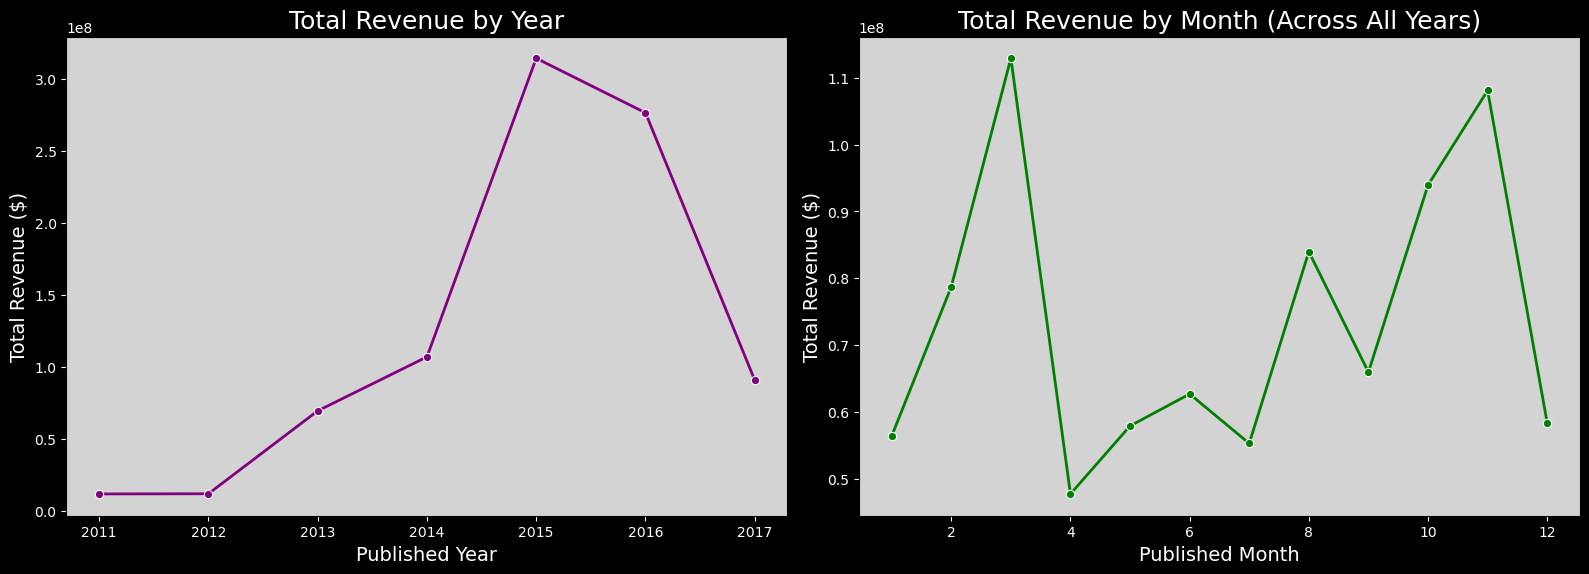

In [595]:
# 5.Line chart for revenue by year and by month

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the revenue data
revenue_by_year = df.groupby('published_year')['revenue'].sum().reset_index()
revenue_by_month = df.groupby('published_month')['revenue'].sum().reset_index()

# Set the figure size and create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create a 1x2 grid of subplots

# Set the background color for the figure to black
fig.patch.set_facecolor('black')  # Set figure background to black

# Revenue by Year plot
sns.lineplot(data=revenue_by_year, x='published_year', y='revenue', marker='o', linewidth=2, color='purple', ax=axes[0])
axes[0].set_title('Total Revenue by Year', fontsize=18, color='white')
axes[0].set_xlabel('Published Year', fontsize=14, color='white')
axes[0].set_ylabel('Total Revenue ($)', fontsize=14, color='white')
axes[0].set_facecolor('lightgrey')  # Set axes background to light grey
axes[0].tick_params(axis='x', colors='white')
axes[0].tick_params(axis='y', colors='white')

# Revenue by Month plot
sns.lineplot(data=revenue_by_month, x='published_month', y='revenue', marker='o', linewidth=2, color='green', ax=axes[1])
axes[1].set_title('Total Revenue by Month (Across All Years)', fontsize=18, color='white')
axes[1].set_xlabel('Published Month', fontsize=14, color='white')
axes[1].set_ylabel('Total Revenue ($)', fontsize=14, color='white')
axes[1].set_facecolor('lightgrey')  # Set axes background to light grey
axes[1].tick_params(axis='x', colors='white')
axes[1].tick_params(axis='y', colors='white')

# Adjust layout to make the plots fit nicely
plt.tight_layout()
plt.show()


<div style="background-color: white; 
            padding: 15px; 
            border-radius: 8px; 
            border: 3px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 30px; 
            font-weight: 700; 
            margin-bottom: 15px;">
    <h3 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 30px; 
               font-weight: 700; /* Kalın */
               font-style: italic; /* İtalik */
               margin: 0;">
        Content Duration Analysis
    </h3>
</div>

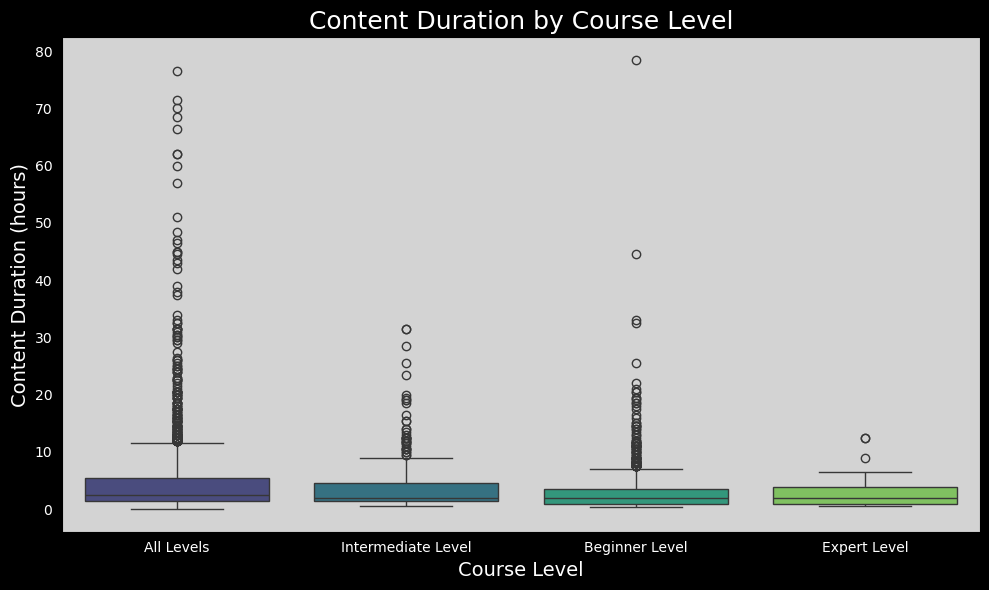

In [596]:
# 6.Boxplot for content duration by course level

import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the background color for the figure to black
plt.gcf().patch.set_facecolor('black')  # Set figure background to black

# Create a boxplot for content duration by course level
ax = sns.boxplot(data=df, x='level', y='content_duration', palette='viridis')

# Set the background color of the axes to light grey
ax.set_facecolor('lightgrey')  # Set axes background to light grey

# Add titles and labels with white color
plt.title('Content Duration by Course Level', fontsize=18, color='white')
plt.xlabel('Course Level', fontsize=14, color='white')
plt.ylabel('Content Duration (hours)', fontsize=14, color='white')

# Set the tick labels to white
plt.xticks(color='white')
plt.yticks(color='white')

# Show the plot
plt.tight_layout()
plt.show()


<div style="background-color: white; 
            padding: 15px; 
            border-radius: 8px; 
            border: 3px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 30px; 
            font-weight: 700; 
            margin-bottom: 15px;">
    <h3 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 30px; 
               font-weight: 700; /* Kalın */
               font-style: italic; /* İtalik */
               margin: 0;">
        Most Popular Courses
    </h3>
</div>

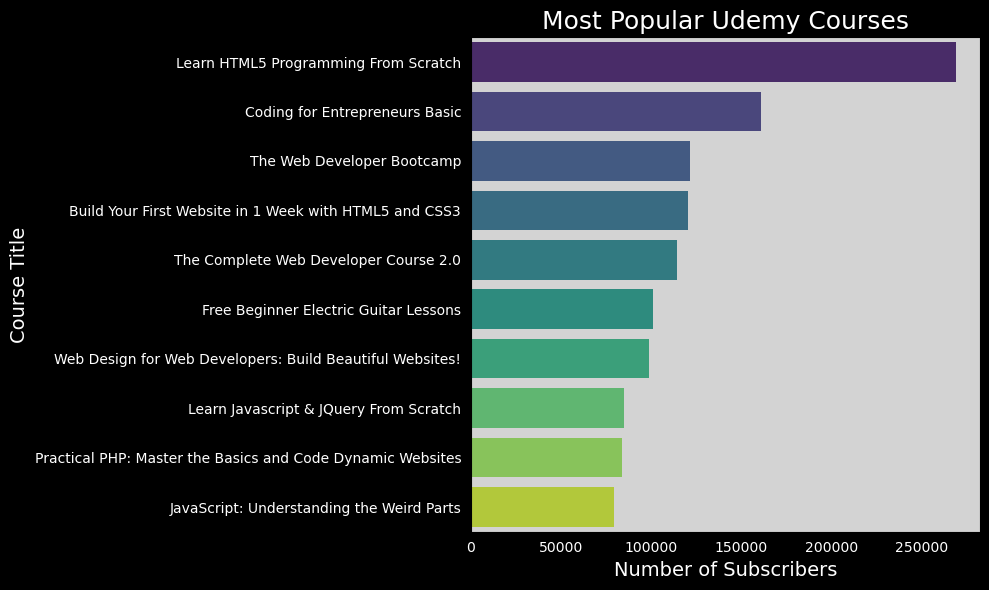

In [597]:
# 7.Bar chart for top 10 most popular courses by subscribers
import pandas as pd


# Get the top 10 courses by number of subscribers
top_courses = df.nlargest(10, 'num_subscribers')[['course_title', 'num_subscribers']]

# Now you can create the bar plot
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the background color for the figure to black
plt.gcf().patch.set_facecolor('black')  # Set figure background to black

# Create a bar plot for the most popular courses
sns.barplot(x='num_subscribers', y='course_title', data=top_courses, palette='viridis')

# Add titles and labels with white color
plt.title('Most Popular Udemy Courses', fontsize=18, color='white')
plt.xlabel('Number of Subscribers', fontsize=14, color='white')
plt.ylabel('Course Title', fontsize=14, color='white')

# Set the background color of the axes to light grey
ax = plt.gca()  # Get current axes
ax.set_facecolor('lightgrey')  # Set axes background to light grey

# Set the tick labels to white
plt.xticks(color='white')
plt.yticks(color='white')

# Show the plot
plt.tight_layout()
plt.show()


<div style="background-color: white; 
            padding: 15px; 
            border-radius: 8px; 
            border: 3px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 30px; 
            font-weight: 700; 
            margin-bottom: 15px;">
    <h3 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 30px; 
               font-weight: 700; /* Kalın */
               font-style: italic; /* İtalik */
               margin: 0;">
        Relationship Between Number of Lectures and Reviews
    </h3>
</div>

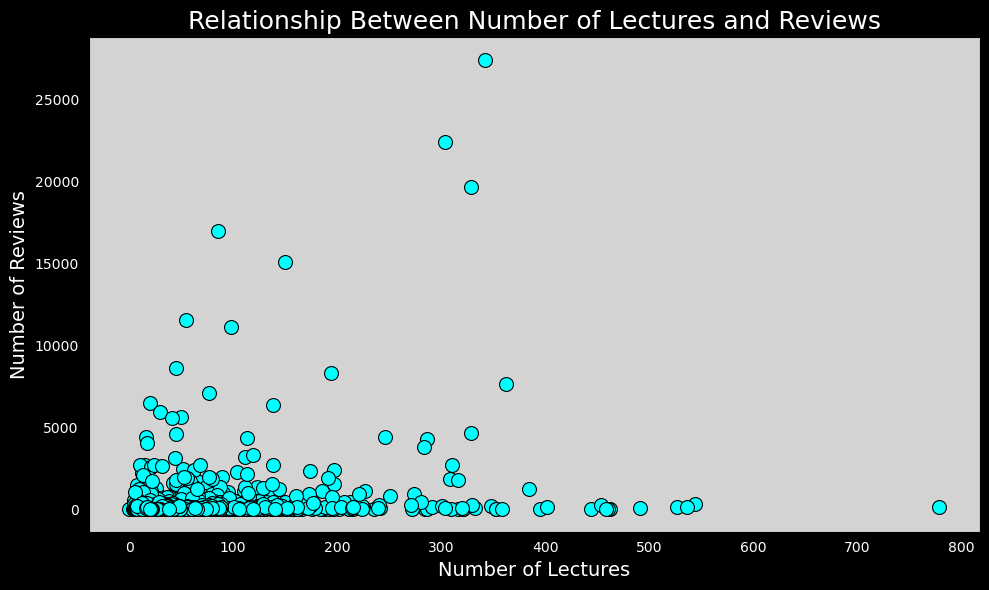

In [598]:
# 8.Scatter plot for number of lectures vs. reviews

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the data
# Set the figure size
plt.figure(figsize=(10, 6))

# Set the background color for the figure to black
plt.gcf().patch.set_facecolor('black')  # Set figure background to black

# Create the scatter plot for number of lectures vs. reviews
sns.scatterplot(data=df, x='num_lectures', y='num_reviews', color='cyan', s=100, edgecolor='black')

# Add titles and labels with white color
plt.title('Relationship Between Number of Lectures and Reviews', fontsize=18, color='white')
plt.xlabel('Number of Lectures', fontsize=14, color='white')
plt.ylabel('Number of Reviews', fontsize=14, color='white')

# Set the background color of the axes to light grey
ax = plt.gca()  # Get current axes
ax.set_facecolor('lightgrey')  # Set axes background to light grey

# Set the tick labels to white
plt.xticks(color='white')
plt.yticks(color='white')

# Show the plot
plt.tight_layout()
plt.show()


<div style="background-color: white; 
            padding: 15px; 
            border-radius: 8px; 
            border: 3px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 30px; 
            font-weight: 700; 
            margin-bottom: 15px;">
    <h3 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 30px; 
               font-weight: 700; /* Kalın */
               font-style: italic; /* İtalik */
               margin: 0;">
        Paid & Free Courses Analysis
    </h3>
</div>

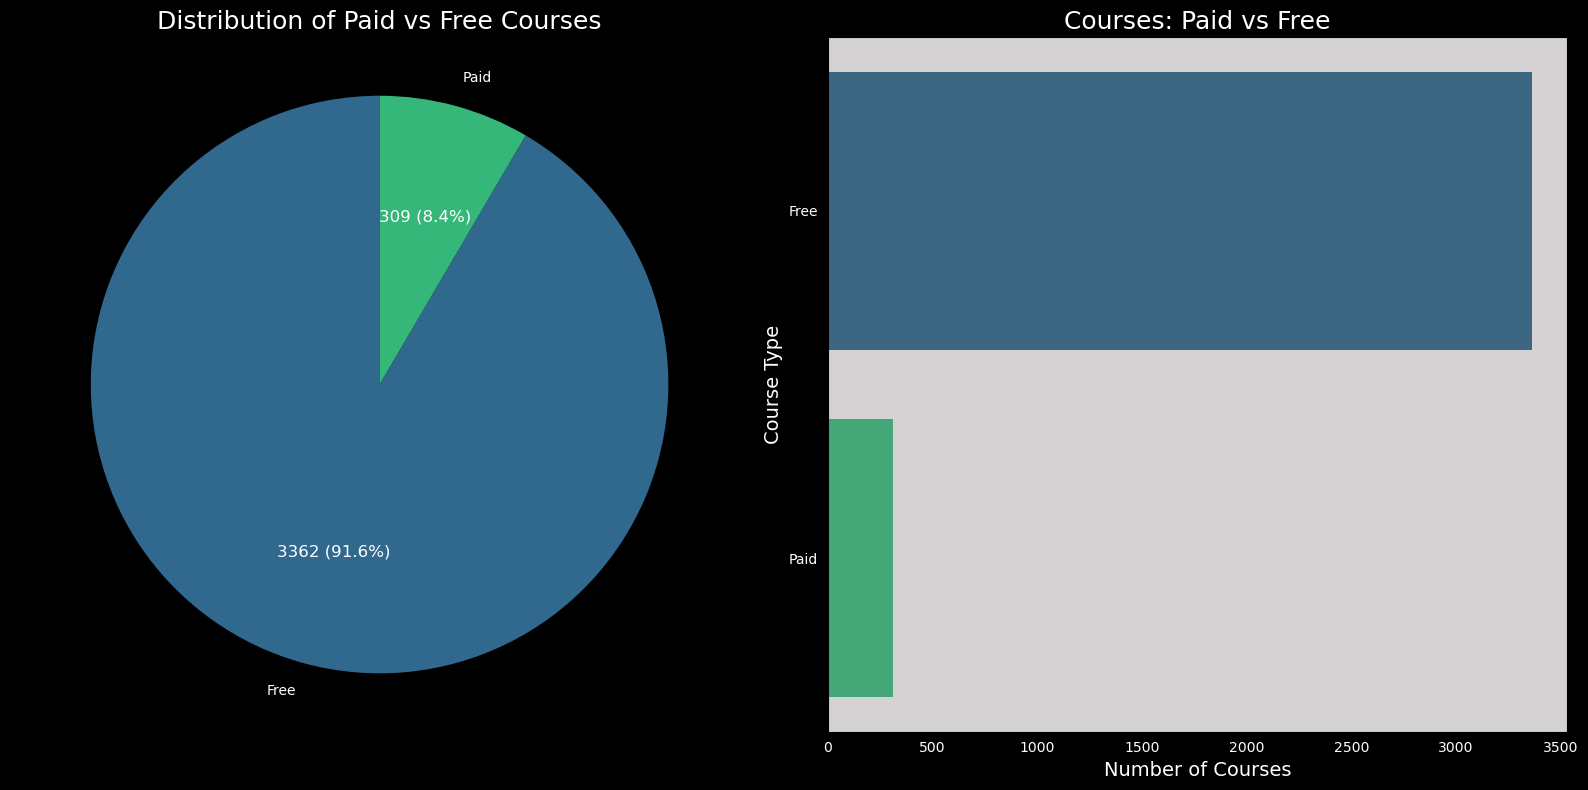

In [599]:
# 9.Pie chart and Bar chart for paid vs free courses

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the courses data

# Count the number of paid and free courses
paid_free_counts = df['is_paid'].value_counts()

# Set the figure size and layout for two plots (1 row, 2 columns)
plt.figure(figsize=(16, 8))

# Set the background color of the entire figure to black
plt.gcf().patch.set_facecolor('black')

# First subplot: Pie chart for paid/free courses
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot

# Function to format percentage text
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))  # Calculate the absolute value
    return f'{absolute} ({pct:.1f}%)'  # Return the string to display

# Create pie chart
wedges, texts, autotexts = plt.pie(paid_free_counts, 
                                   labels=['Free', 'Paid'] if paid_free_counts.index[0] else ['Paid', 'Free'], 
                                   autopct=lambda pct: func(pct, paid_free_counts), 
                                   startangle=90, 
                                   colors=sns.color_palette("viridis", len(paid_free_counts)))

# Customize the appearance of the texts
for text in texts:
    text.set_color('white')  # Set course types to white

for autotext in autotexts:
    autotext.set_color('white')  # Set percentage text to white
    autotext.set_fontsize(12)  # Set font size for percentage text

plt.title('Distribution of Paid vs Free Courses', fontsize=18, color='white')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Set the background color of the axes to light gray
plt.gca().set_facecolor('#d4d2d2')


# Second subplot: Bar chart for paid/free courses
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot

# Create bar chart
sns.barplot(x=paid_free_counts.values, y=['Free', 'Paid'] if paid_free_counts.index[0] else ['Paid', 'Free'], palette="viridis")

# Customize the appearance
plt.title('Courses: Paid vs Free', fontsize=18, color='white')
plt.xlabel('Number of Courses', fontsize=14, color='white')
plt.ylabel('Course Type', fontsize=14, color='white')

# Set the axis face color to light grey and tick labels to white
ax = plt.gca()
ax.set_facecolor('#d4d2d2')  # Set the background color of the axes to light grey
plt.xticks(color='white')  # Set x-axis tick labels to white
plt.yticks(color='white')  # Set y-axis tick labels to white

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


<div style="background-color: white; 
            padding: 15px; 
            border-radius: 8px; 
            border: 3px solid #A435F0; /* Mor çerçeve */
            font-family: Trebuchet MS; 
            font-size: 30px; 
            font-weight: 700; 
            margin-bottom: 15px;">
    <h3 style="color: #A435F0; /* Mor yazı rengi */
               font-size: 30px; 
               font-weight: 700; /* Kalın */
               font-style: italic; /* İtalik */
               margin: 0;">
        Correlation Analysis
    </h3>
</div>

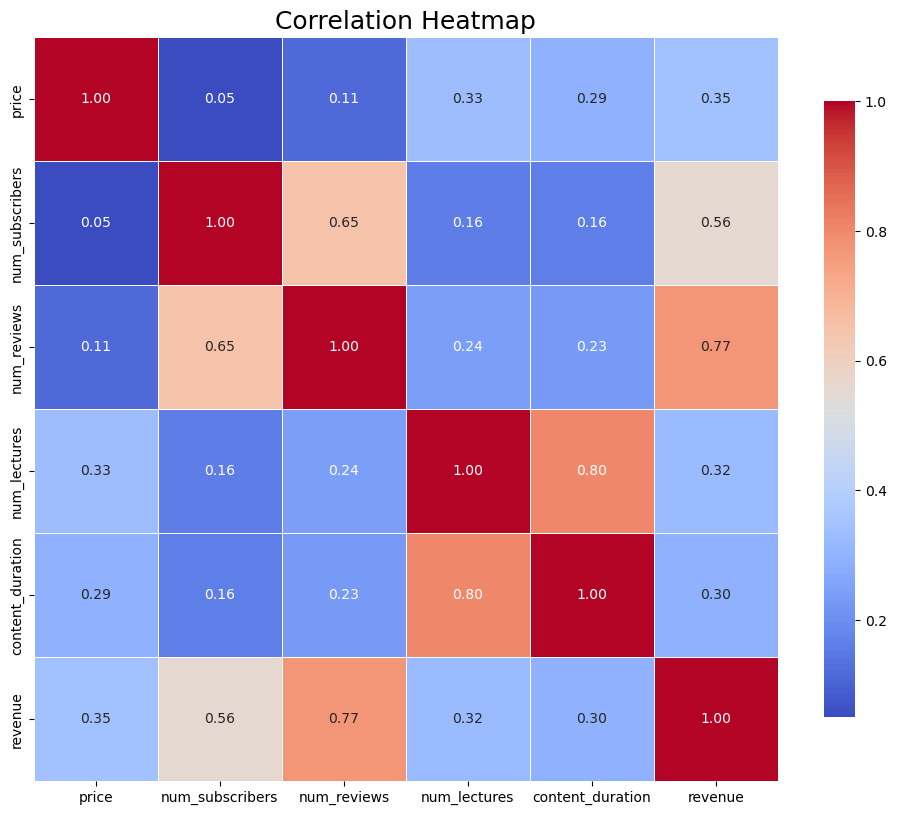

In [600]:
# 10.Correlation heatmap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
# Example: df = pd.read_csv('your_data.csv')

# 2. Select numerical variables (excluding course_id)
numerical_df = df.drop(columns=['course_id']).select_dtypes(include=['float64', 'int64'])

# 3. Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# 4. Create a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, 
            linewidths=0.5, linecolor='white', cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

Recommendations
Dynamic Pricing: Implement a flexible pricing model that adjusts based on course popularity and user feedback.
Marketing Strategies: Increase the promotion of popular web development and business finance courses through social media platforms. Strengthen marketing strategies for high-priced courses that offer comprehensive content and certifications.
Content Development: Continuously update course content and add new modules to enhance student satisfaction.
Quality Improvement: Provide resources for instructors to enhance course quality and teaching effectiveness.
Feedback Mechanisms: Establish an effective feedback mechanism where students can provide improvement suggestions. Create a robust system that allows students to suggest improvements or additional topics.
Bundle Offers: Offer discounted packages to encourage users to purchase multiple related courses.

Conclusion
This evaluation provides valuable insights for shaping the strategic decisions of online education platforms. The consistency between the analyses and recommendations suggests an effective roadmap for increasing the popularity of online courses and maximizing revenue potential. This summary encapsulates the key findings and recommendations regarding course popularity, pricing strategies, and potential improvements for online education platforms, making it suitable for your project needs.

The provided values illustrate the relationships between various variables, which are crucial for making strategic decisions in educational platforms or content providers. Here is an analysis and recommendations based on this data:

1. Relationships Between Variables

Price and Other Variables:
The correlation between price and num_subscribers (0.05) and num_reviews (0.11) is weak, indicating that price does not directly influence subscriber or review numbers.
However, the relationship between price and revenue (0.35) is stronger, suggesting that price has a more significant impact on revenue.
Num_Subscribers and Revenue:
There is a strong correlation between num_subscribers and revenue (0.56), indicating that the number of subscribers significantly affects revenue.
Num_Reviews and Revenue:
The highest correlation is found between num_reviews and revenue (0.77). This suggests that user reviews and ratings have a substantial effect on revenue.
Num_Lectures and Content Duration:
The relationship between num_lectures and content_duration is quite high (0.80), indicating that more lectures are generally associated with longer content durations.

2. Recommendations

Pricing Strategy:
When developing pricing strategies, it is crucial to enhance content quality and encourage user reviews. High-quality content and positive reviews can lead to an increase in subscriber numbers.
Content Development:
Adding more lectures and optimizing content duration can improve user experience and contribute to revenue growth.
Marketing Strategies:
Campaigns can be organized to increase user reviews. Positive reviews can enhance potential users' interest in the platform.

Summary of Analysis: Web Development and Business Finance Popularity

Web Development Popularity
High Demand: Web development courses, such as "Learn HTML5 Programming From Scratch" and "Coding for Entrepreneurs Basic," attract a significant number of subscribers. This indicates a strong desire among users to learn web development skills.

Pricing Trends
Price Range: Most web development courses are priced between $30 and $200. Users' sensitivity to price changes leads to higher-priced courses generally attracting fewer subscribers.

Revenue Potential
Large Subscriber Base: Web development courses can generate significant revenue when they have large subscriber bases. For instance, a course with 16,900 subscribers could potentially earn around $3.38 million.

Business Finance Popularity
Finance Education: Business finance is also a highly sought-after topic, with courses in this area helping users enhance their financial knowledge and skills. This reflects the desire of entrepreneurs and professionals to improve their financial literacy.

Recommendations
Dynamic Pricing: Implement a flexible pricing model based on course popularity and user feedback.
Marketing Strategies: Increase the promotion of popular web development and business finance courses through social media platforms.
Content Development: Continuously update course content and add new modules to enhance student satisfaction.
Feedback Mechanisms: Establish an effective feedback mechanism where students can provide improvement suggestions.
Bundle Offers: Offer discounted packages to encourage users to purchase multiple related courses.

<div style="background-color: #A435F0; 
            padding: 20px; 
            border-radius: 10px; 
            font-family: Trebuchet MS; font-size: 35px; font-weight: 900; font-style: italic;
            margin-bottom: 20px;">
    <h1 style="color: #F7F9FA; 
               font-size: 35px; 
               font-weight: 700; 
               margin: 0;">
        Step 6: Conclusion
    </h1>
</div>


1. Course Popularity
High Demand for Financial Courses: Analysis shows that finance-related courses attract a significant number of subscribers, confirming users' desire to acquire knowledge in this area.
2. Pricing Trends
Price Sensitivity: Course prices generally range from $30 to $200, with higher-priced courses typically attracting fewer subscribers. This indicates that users are sensitive to price changes.
3. Revenue Potential
Significant Income from Large Subscriber Bases: Courses with large subscriber numbers can generate substantial revenue. For example, a course with 16,900 subscribers priced at $200 could potentially earn around $3.38 million.
4. Content Engagement
Preference for Comprehensive Content: Longer courses tend to attract more subscribers, supporting the idea that users prefer in-depth content.
Recommendations
Dynamic Pricing: Implement a pricing model that adjusts based on course popularity and subscriber feedback.
Marketing for Premium Courses: Strengthen marketing strategies for high-priced courses that offer comprehensive content and certifications.
Quality Improvement: Provide resources for instructors to enhance course quality and teaching effectiveness.
Feedback Systems: Establish a robust feedback mechanism that allows students to suggest improvements or additional topics.
Bundle Offers: Offer discounted package courses to encourage users to purchase multiple related courses.

This evaluation provides valuable insights for shaping the strategic decisions of online education platforms. The consistency between the analyses and recommendations suggests an effective roadmap for increasing the popularity of online courses and maximizing revenue potential. This summary encapsulates the key findings and recommendations regarding course popularity, pricing strategies, and potential improvements for online education platforms, making it suitable for your project needs.